# Gen tables

In [1]:
%load_ext autoreload
%autoreload 2

from source.utils.plot import collect_gen_table
import matplotlib.pyplot as plt
import numpy as np
import jlc
import pandas as pd

## Entitity hyper param sweeps

In [3]:
r = ["input_scale","model_name","loss_weights","predict"]
table = collect_gen_table(gen_id_patterns="ent[512]_*",
                        record_from_args=r,
                        verbose=False)
#sort by max_ari
table = table.sort_values("max_ari",ascending=False)
table[["ari","max_ari"]+r]


,ari,max_ari,input_scale,model_name,loss_weights,predict
0,0.357,0.449,0.10,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.346,0.437,0.30,entity[sid2][sigmoid_sweep],sigmoid_-4,x
0,0.345,0.437,0.20,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.333,0.423,0.06,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.335,0.422,0.30,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.328,0.414,0.30,entity[sid2][sigmoid_sweep],sigmoid_-2,x
0,0.304,0.387,0.60,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.299,0.383,0.30,entity[sid2][pred_lw_sweep],SNR_plus1,x
0,0.286,0.377,0.03,entity[sid2][input_scale_sweep],sigmoid_-4,x
0,0.278,0.364,0.30,entity[sid2][sigmoid_sweep],sigmoid_0,x


Text(0, 0.5, 'ARI')

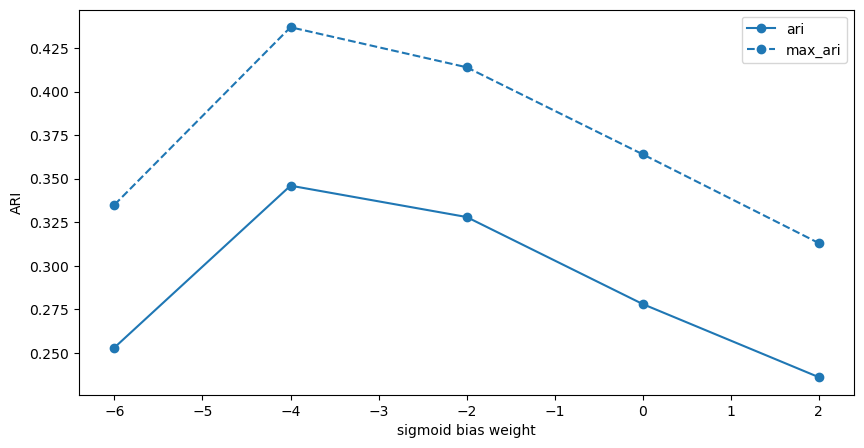

In [4]:
# plot ari and max_ari over sigmoid_sweep

mask = table["model_name"]=="entity[sid2][sigmoid_sweep]"

fig = plt.figure(figsize=(10,5))
x = table[mask]["loss_weights"].apply(lambda x: float(x.split("_")[-1])).values
x_order = np.argsort(x)
x = x[x_order]
plt.plot(x,table[mask]["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table[mask]["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
plt.legend()
plt.xlabel("sigmoid bias weight")
plt.ylabel("ARI")

Text(0.5, 0, 'loss_weights')

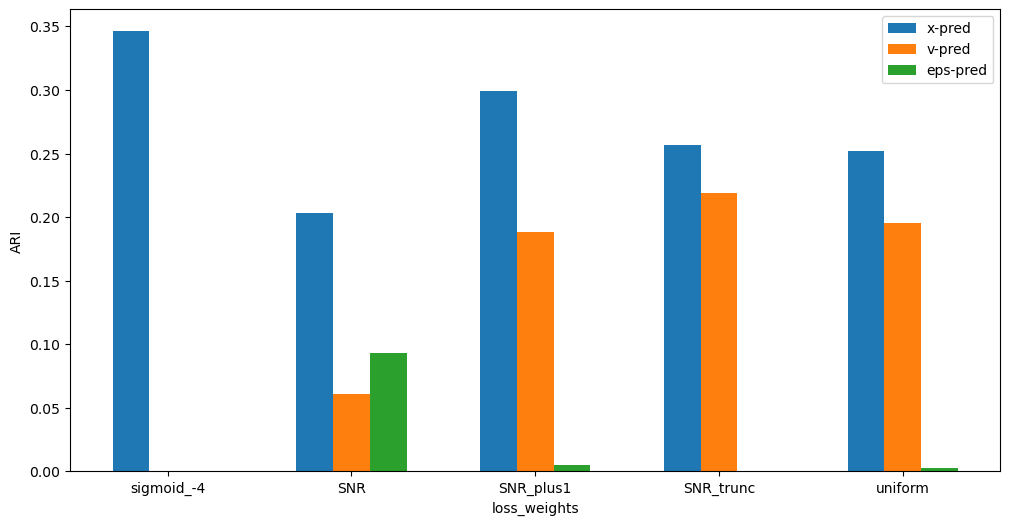

In [19]:
# plot ari and max_ari over pred and lw sweeps

fig = plt.figure(figsize=(12,6))
x_labels = ["sigmoid_-4","SNR","SNR_plus1","SNR_trunc","uniform"]
x = range(len(x_labels))
delta = 0.2
for k,predict in enumerate(["x","v","eps"]):
    y = [None for _ in x]
    for row in table.iterrows():
        correct_mn = row[1]["model_name"] in ["entity[sid2][sigmoid_sweep]", "entity[sid2][pred_lw_sweep]"]
        correct_x = row[1]["loss_weights"] in x_labels
        correct_p = row[1]["predict"]==predict
        #print(correct_mn,correct_x,correct_p)
        if correct_p and correct_mn and correct_x:
            pred = row[1]["predict"]
            x_idx = x_labels.index(row[1]["loss_weights"])
            y[x_idx] = row[1]["ari"]
    x_hat = np.array(x) + (k-1)*delta
    y_hat = np.array(y)
    #handle none
    x_hat,y_hat = x_hat[y_hat!=None],y_hat[y_hat!=None] 
    plt.bar(x_hat,y_hat,delta,label=predict+"-pred")
plt.legend()
plt.xticks(x,x_labels)
plt.ylabel("ARI")
plt.xlabel("loss_weights")
    

Text(0, 0.5, 'ARI')

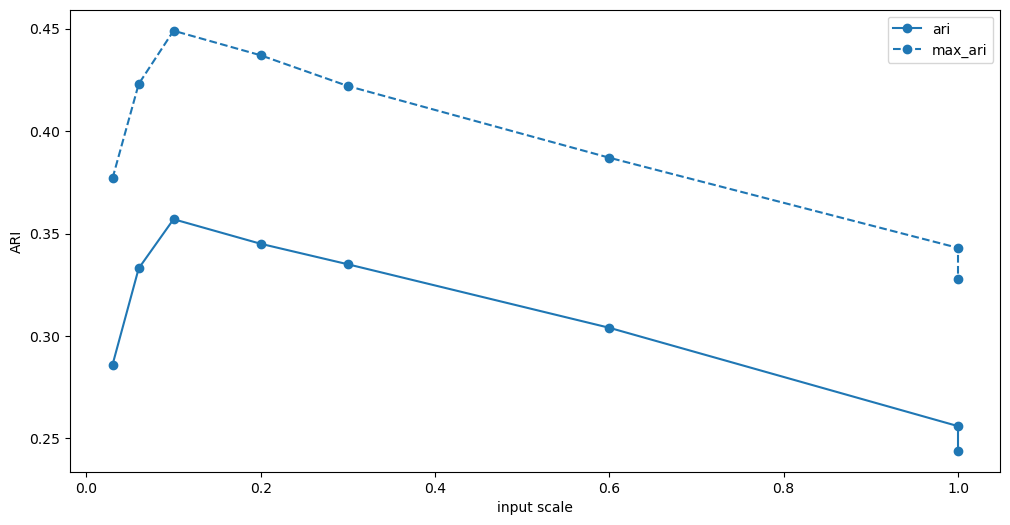

In [20]:
#plot ari and max_ari over input scale sweep

fig = plt.figure(figsize=(12,6))
mask = table["model_name"]=="entity[sid2][input_scale_sweep]"
x = table[mask]["input_scale"].values
x_order = np.argsort(x)
x = x[x_order]
plt.plot(x,table[mask]["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table[mask]["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
plt.legend()
plt.xlabel("input scale")
plt.ylabel("ARI")

In [24]:
table = collect_gen_table(gen_id_patterns="ent[ts_sweep][64]_*",
                          model_id_patterns="entity[sid2][input_scale_sweep]_6",
                        record_from_sample_opts=["num_timesteps","sampler_type"],
                        include_mode="all",
                        verbose=False)
table

,ari,gen_id,gen_setup,hiou,iou,max_ari,max_hiou,step,num_timesteps,sampler_type,save_path
0,0.166,ent[ts_sweep][64]_0,ent[ts_sweep][64],0.044,0.002,0.224,0.053,50000.0,2.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
1,0.202,ent[ts_sweep][64]_1,ent[ts_sweep][64],0.050,0.002,0.275,0.062,50000.0,2.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
2,0.269,ent[ts_sweep][64]_2,ent[ts_sweep][64],0.051,0.002,0.352,0.064,50000.0,5.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
3,0.269,ent[ts_sweep][64]_3,ent[ts_sweep][64],0.052,0.002,0.345,0.065,50000.0,5.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
4,0.296,ent[ts_sweep][64]_4,ent[ts_sweep][64],0.053,0.002,0.375,0.068,50000.0,10.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
5,0.288,ent[ts_sweep][64]_5,ent[ts_sweep][64],0.048,0.002,0.362,0.058,50000.0,10.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
6,0.332,ent[ts_sweep][64]_6,ent[ts_sweep][64],0.058,0.003,0.425,0.078,50000.0,20.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
7,0.295,ent[ts_sweep][64]_7,ent[ts_sweep][64],0.046,0.002,0.364,0.054,50000.0,20.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
8,0.332,ent[ts_sweep][64]_8,ent[ts_sweep][64],0.060,0.002,0.430,0.078,50000.0,50.0,ddpm,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
9,0.288,ent[ts_sweep][64]_9,ent[ts_sweep][64],0.044,0.002,0.361,0.052,50000.0,50.0,ddim,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...


Text(0, 0.5, 'ARI')

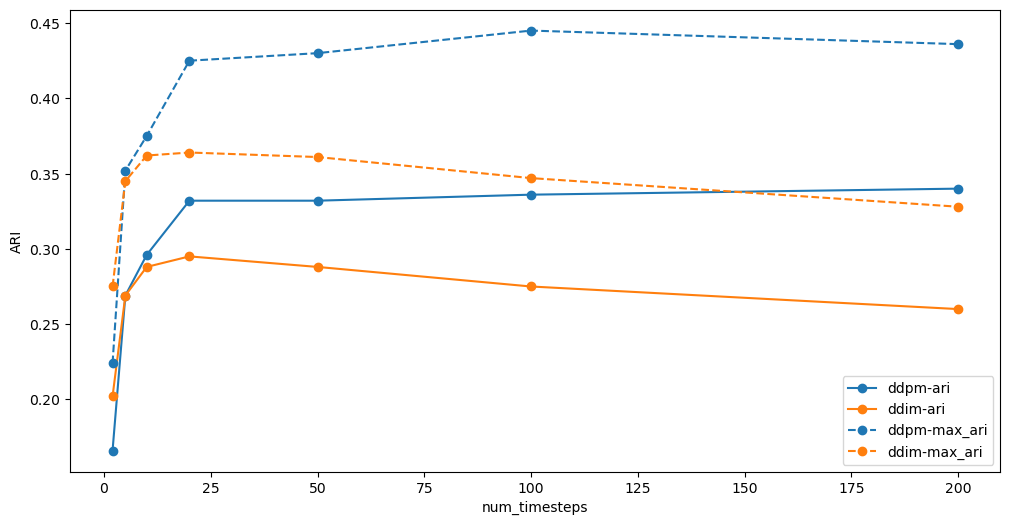

In [29]:
fig = plt.figure(figsize=(12,6))


for m in ["ari","max_ari"]:
    for sampler_type in table["sampler_type"].unique():
        mask = table["sampler_type"]==sampler_type
        x = table[mask]["num_timesteps"].values
        x_order = np.argsort(x)
        x = x[x_order]
        y = table[mask][m].values[x_order]
        plt.plot(x,y,
                 "o-" if m=="ari" else "o--",
                 label=f"{sampler_type}-{m}",
                 color="C0" if sampler_type=="ddpm" else "C1")
plt.legend()
plt.xlabel("num_timesteps")
plt.ylabel("ARI")

In [30]:
table = collect_gen_table(gen_id_patterns="ent[gw_sweep][64]_*",
                          model_id_patterns="entity[sid2][input_scale_sweep]_6",
                        record_from_sample_opts=["guidance_weight"],
                        include_mode="all",
                        verbose=False)
table

,ari,gen_id,gen_setup,hiou,iou,max_ari,max_hiou,step,guidance_weight,save_path
0,0.077,ent[gw_sweep][64]_0,ent[gw_sweep][64],0.034,0.003,0.150,0.051,50000.0,-1.0,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
1,0.297,ent[gw_sweep][64]_1,ent[gw_sweep][64],0.056,0.002,0.397,0.076,50000.0,-0.1,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
2,0.320,ent[gw_sweep][64]_2,ent[gw_sweep][64],0.057,0.002,0.413,0.077,50000.0,0.0,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
3,0.335,ent[gw_sweep][64]_3,ent[gw_sweep][64],0.058,0.002,0.425,0.078,50000.0,0.1,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
4,0.344,ent[gw_sweep][64]_4,ent[gw_sweep][64],0.057,0.003,0.432,0.073,50000.0,0.2,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
5,0.351,ent[gw_sweep][64]_5,ent[gw_sweep][64],0.057,0.002,0.437,0.071,50000.0,0.3,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
6,0.360,ent[gw_sweep][64]_6,ent[gw_sweep][64],0.057,0.002,0.443,0.072,50000.0,0.5,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
7,0.374,ent[gw_sweep][64]_7,ent[gw_sweep][64],0.056,0.002,0.457,0.068,50000.0,0.8,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
8,0.378,ent[gw_sweep][64]_8,ent[gw_sweep][64],0.055,0.002,0.461,0.066,50000.0,1.0,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...
9,0.382,ent[gw_sweep][64]_9,ent[gw_sweep][64],0.054,0.002,0.462,0.063,50000.0,1.5,saves/ver-1.4.4/02-19-06-08_entity[sid2][input...


Text(0, 0.5, 'ARI')

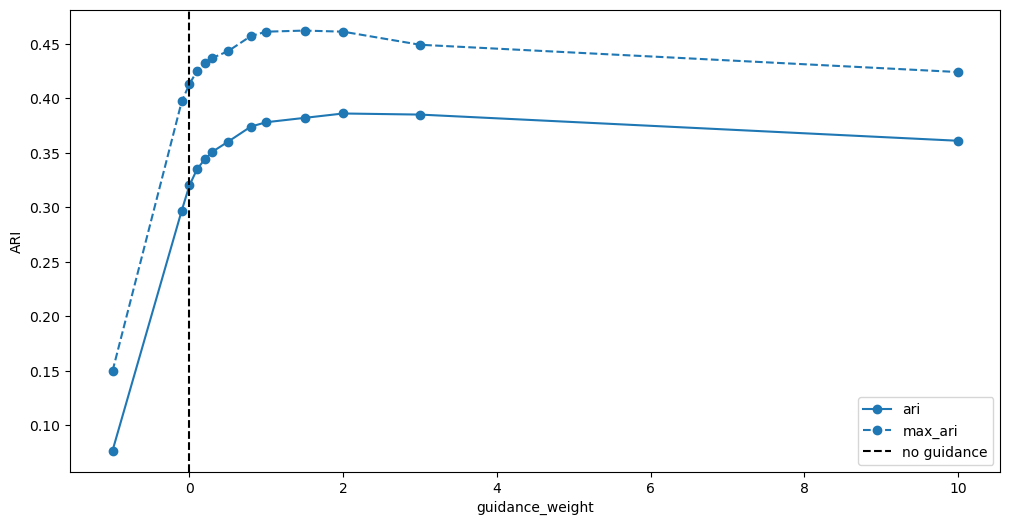

In [33]:
plt.figure(figsize=(12,6))
x = table["guidance_weight"].values
x_order = np.argsort(x)
x = x[x_order]

plt.plot(x,table["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
#get current ybounds
ymin,ymax = plt.gca().get_ylim()
plt.plot([0,0],[ymin,ymax],"k--",label="no guidance")
plt.ylim(ymin,ymax)
plt.legend()
plt.xlabel("guidance_weight")
plt.ylabel("ARI")

## Entity with SAM eval sweeps

In [7]:
r = ["num_timesteps","sampler_type","guidance_weight"]
table = collect_gen_table(gen_id_patterns=["ent[gw_sweep][64]","ent[ts_sweep][64]"],
                          model_id_patterns="entity[sid2][v3][sam_depth_sweep]+nocond_2",
                        record_from_sample_opts=r,
                        include_mode="all",
                        verbose=False)
#sort by max_ari
table = table.sort_values("max_ari",ascending=False)
table[["ari","max_ari","gen_setup"]+r];


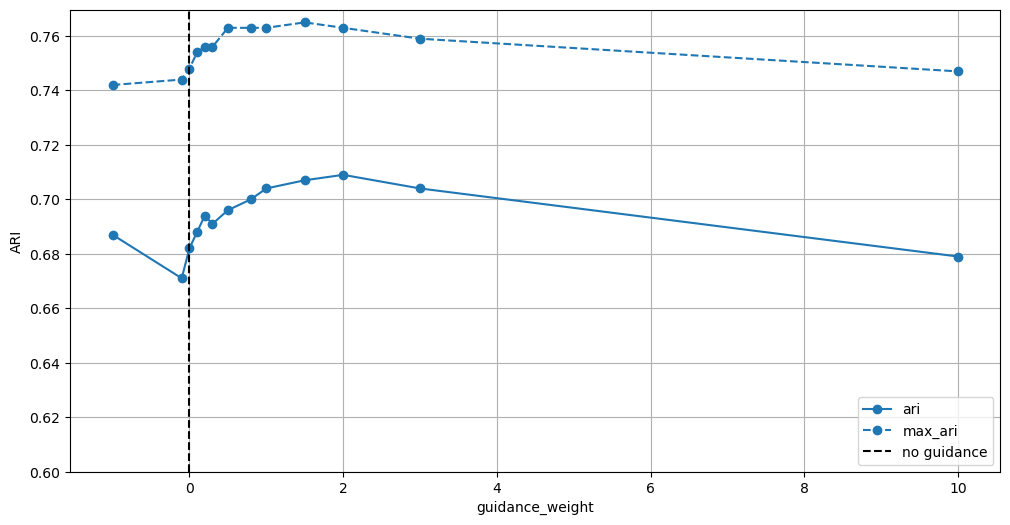

In [14]:
plt.figure(figsize=(12,6))
x = table["guidance_weight"].values
x_mask = table["gen_setup"]=="ent[gw_sweep][64]"
x = x[x_mask]
x_order = np.argsort(x)
x = x[x_order]

plt.plot(x,table["ari"].values[x_order],"o-",label="ari",color="C0")
plt.plot(x,table["max_ari"].values[x_order],"o--",label="max_ari",color="C0")
#get current ybounds
ymin,ymax = plt.gca().get_ylim()
ymin = .6
plt.plot([0,0],[ymin,ymax],"k--",label="no guidance")
plt.ylim(ymin,ymax)
plt.legend()
plt.xlabel("guidance_weight")
plt.ylabel("ARI")
plt.grid()

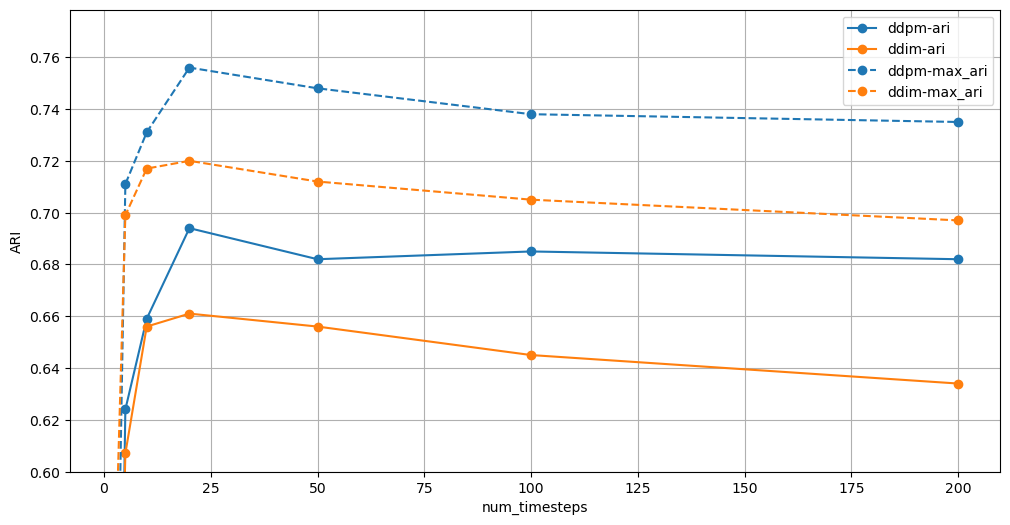

In [18]:
fig = plt.figure(figsize=(12,6))

for m in ["ari","max_ari"]:
    for sampler_type in table["sampler_type"].unique():
        mask = np.logical_and(table["sampler_type"]==sampler_type,
                              table["gen_setup"]=="ent[ts_sweep][64]")
        x = table[mask]["num_timesteps"].values
        x_order = np.argsort(x)
        x = x[x_order]
        y = table[mask][m].values[x_order]
        plt.plot(x,y,
                 "o-" if m=="ari" else "o--",
                 label=f"{sampler_type}-{m}",
                 color="C0" if sampler_type=="ddpm" else "C1")
plt.legend()
plt.xlabel("num_timesteps")
plt.ylabel("ARI")
plt.ylim(0.6,None)
plt.grid()

# plot samples from dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt
import os,sys
sys.path.append('./source/')
import matplotlib.pyplot as plt
from source.utils.mixed import set_random_seed, apply_mask
from source.utils.dataloading import get_dataset_from_args
from source.utils.plot import (visualize_dataset_with_labels, 
                              visualize_batch,visualize_cond_batch,
                              mask_overlay_smooth,imagenet_preprocess)
from source.utils.argparsing import TieredParser
import argparse
import torch
import numpy as np
import jlc
from PIL import Image

In [ ]:

modified_args={"diff_channels": 3,
                "dl_num_workers": 0,
                "semantic_dl_prob": 0,
                "seed": 2,
                "train_batch_size": 32,
                "image_size": 256,
                "imagenet_norm": 1,
                "datasets": "entityseg"}
args = TieredParser().get_args(alt_parse_args=["--model_name","g25"],modified_args=modified_args)
dataset = get_dataset_from_args(args,split="test",return_type="dli")

processing dataset:  entityseg


In [3]:

entityseg_idx = [33016,32561,32148,32604,11580,5711 ,11149,32090,
                 11295,32661,21645,32098,32284,33182,32736,4045 ,
                 31963,27972,24559,33028,33195,22166,13304,31988,
                 13481,32407,32097,16365,14600,12161,32598,32933]
pri_didx = [f"entityseg/{idx}" for idx in entityseg_idx]
modified_args={"diff_channels": 3,
                "dl_num_workers": 0,
                "semantic_dl_prob": 0,
                "seed": 2,
                "train_batch_size": len(entityseg_idx),
                "image_size": 256,
                "imagenet_norm": 1,
                "datasets": "entityseg"}

args = TieredParser().get_args(alt_parse_args=["--model_name","g25"],modified_args=modified_args)

dataset = get_dataset_from_args(args,split="test",return_type="dli",prioritized_didx=pri_didx,mode="pri_didx")


processing dataset:  entityseg


In [4]:
batch = next(dataset)
visualize_batch(batch,create_figure=0,figsize_per_pixel=0.002,class_text_size=10,with_class_names=1,
                with_text_didx=1,alpha_mask=0.4,show_border=1,crop=1,n_col=8)
plt.axis("off");
jlc.zoom()

In [70]:
print([batch[1][i]["split_idx"] for i in range(len(batch[1]))])

[2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2]


# Eval sam and Plot data overlay

In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.append('./source/')
from sam import evaluate_sam
from eval_and_plotting import SavedSamples, SavedSamplesManager
import matplotlib.pyplot as plt
import argparse
import torch
import numpy as np
import jlc
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
named_didx = jlc.load_json_to_dict_list("/home/jloch/Desktop/diff/diffusion2/jsons/pri_didx.json")
pri_didx = named_didx["entity_repeat"]
eval_sam_kwargs = argparse.Namespace(datasets="entityseg",
                                    model_type="sam1_h",
                                    num_return_segments=32,
                                    split="all",
                                    ratio_of_dataset=32,
                                    generator_kwargs={},
                                    pri_didx=pri_didx,#["cityscapes/3050","cityscapes/3052"],
                                    longest_side_resize=1024,
                                    batch_size=4,
                                    postprocess_kwargs=None,
                                    full_resolution_decoder=True)
metrics_mean, light_data, heavy_data = evaluate_sam(**vars(eval_sam_kwargs))

processing dataset:  entityseg
Evaluating with SAM1 model: sam1_h (sam_vit_h_4b8939)
evaluating 8 batches


 38%|███▊      | 3/8 [00:27<00:44,  8.94s/it]/home/jloch/Desktop/diff/diffusion2/source/sam.py:192: UserWarning: More than 255 segments found, only the largest 255 are included.
  warnings.warn("More than 255 segments found, only the largest 255 are included.")
100%|██████████| 8/8 [01:12<00:00,  9.06s/it]


In [8]:
sam_samples = SavedSamples(light_data=light_data,heavy_data=heavy_data)
sam_samples.save("./saves/sam_eval/sam1_h_entity_repeat32.pt")

In [21]:
sam_samples.heavy_keys()

['pred_int', 'image', 'gt']

In [61]:
jlc.shaprint(sam_samples.heavy_data[0])

{'gt': 'torch.Size([750, 1333, 1])',
 'image': 'torch.Size([750, 1333, 3])',
 'pred_int': 'torch.Size([750, 1333])'}


In [ ]:
sam_samples

In [63]:
postprocess = True
sam_samples = SavedSamples(light_data=light_data,heavy_data=heavy_data)
if postprocess:
    sam_samples.postprocess({"mode": "min_area", "min_area": 0.005})

SavedSamplesManager(sam_samples).mean_metric_table()

/home/jloch/Desktop/diff/diffusion2/source/eval_and_plotting.py:1415: UserWarning: only the first vote is currently implemented for postprocessing
  warnings.warn("only the first vote is currently implemented for postprocessing")


,unnamed
AP,0.183
AP50,0.349
AP75,0.167
ari,0.532
hiou,0.276
iou,0.0122


In [79]:
didx = [sam_samples.didx[i] for i in range(4,8)]
ssm = SavedSamplesManager(sam_samples)
im = ssm.plot_qual_seg(didx=didx,resize_width=512,transpose=1,add_text_axis=0,alpha_mask=0.8)
print(im.shape)

plt.figure(figsize=(15,5))
plt.imshow(im)
jlc.zoom()

(1536, 2135, 3)


# Postprocess savedsamples

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os,sys
import numpy as np
from source.eval_and_plotting import DiffSamples, SavedSamples, SavedSamplesManager
sys.path.append('./source/')
import matplotlib.pyplot as plt

import jlc
import torch
import tqdm
import copy
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
ss2 = DiffSamples(gen_id="entopt[save]_1",is_ambiguous=False)
ss2.load_heavy_data()
ss2.load_heavy_image_gt()

In [113]:
ss2.crop_padding()

In [ ]:
pp_sweep = (np.linspace(0,0.5,10)**2).tolist()
pp_sweep = [round(pp,4) for pp in pp_sweep]

ssm = SavedSamplesManager()
for pp in tqdm.tqdm(pp_sweep):
    ss_pp = ss2.clone(f"pp={pp}")
    ss_pp.postprocess({"mode": "min_area", "min_area": pp})
    ssm.add_saved_samples(ss_pp)

In [45]:
uq = []
for i in range(len(ss_pp.heavy_data)):
    #find #uq in each segmentation
    segmentation = ss_pp.heavy_data[i][ss_pp.segment_key]
    uq.append(segmentation.unique().shape[0])
print(uq)

[57, 56, 18, 50, 54, 58, 50, 50, 47, 29, 49, 49, 49, 34, 58, 13, 56, 61, 31, 60, 54, 33, 62, 45, 43, 33, 19, 63, 23, 44, 53, 27, 56, 26, 45, 33, 30, 62, 36, 19, 27, 64, 45, 19, 19, 41, 42, 22, 35, 57, 53, 43, 31, 55, 39, 18, 16, 32, 53, 58, 63, 47, 27, 12]


In [36]:
ssm.mean_metric_table()

,pp=0.0,pp=0.0031,pp=0.0123,pp=0.0278,pp=0.0494,pp=0.0772,pp=0.1111,pp=0.1512
AP,3.22,12.1,13.9,15.6,15.5,15.2,14.8,12.8
AP50,6.64,21.9,24.9,27.5,27.2,26.0,25.7,23.5
AP75,2.65,10.7,12.2,13.6,14.5,14.8,13.8,12.0
ari,0.562,0.562,0.556,0.538,0.508,0.476,0.426,0.308
hiou,0.0894,0.249,0.271,0.27,0.253,0.238,0.225,0.194
iou,0.00192,0.00316,0.00357,0.00388,0.00455,0.0046,0.00476,0.00468


In [54]:
t = ssm.mean_metric_table()


['AP', 'AP50', 'AP75', 'ari', 'hiou', 'iou']

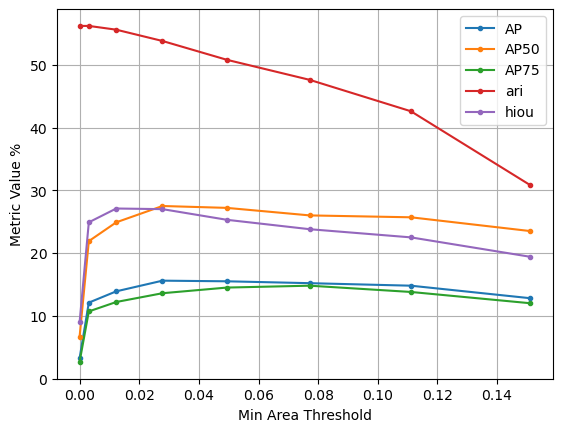

In [110]:
#t = ssm.mean_metric_table()

for k in t.index.tolist():
    if k!="iou":
        mult = 1 if k.startswith("AP") else 100
        plt.plot(pp_sweep[:8],mult*np.array(t.loc[k]).astype(float),".-",label=k)
plt.grid()
plt.ylabel("Metric Value %")
plt.xlabel("Min Area Threshold")
plt.legend()

In [114]:
from source.utils.metric_and_loss import ap_entity
ss2.postprocess({"mode": "min_area", "min_area": 0.04})

In [115]:
ssm = SavedSamplesManager(ss2)
ssm.mean_metric_table()

,entopt[save]_1
AP,0.153
AP50,0.267
AP75,0.136
ari,0.524
hiou,0.259
iou,0.00434


In [158]:
preds = []
gts = []

for i in range(len(ss2.heavy_data)):
    preds.append(ss2.heavy_data[i][ss2.segment_key])
    gts.append(torch.tensor(ss2.heavy_data[i]["gt"][:,:,0]))

out,save_dict = ap_entity(preds,gts,return_save_dict=True)
print(out)

{'AP': 0.03015605437307216, 'AP50': 0.08013184406204875, 'AP75': 0.017851046188362682}


Text(0.5, 1.0, 'Per-mask mean precision')

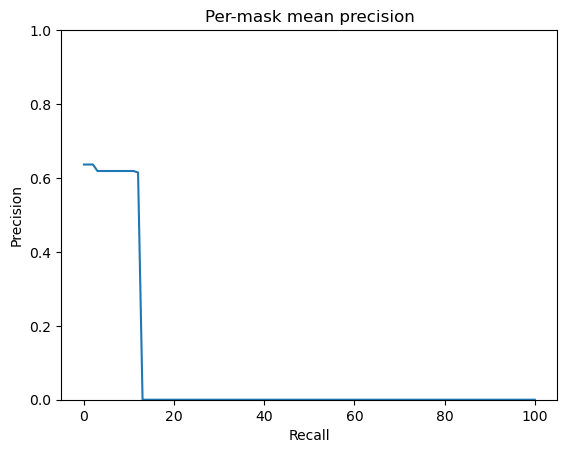

In [160]:
plt.plot(save_dict["eval"]["precision"][0])
plt.ylim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Per-mask mean precision")


In [163]:
out = {k: [] for k,v in out.items()}
pr = []
for pred,gt in zip(preds,gts):
    out_,save_dict = ap_entity(pred,gt,return_save_dict=1)
    pr.append(save_dict["eval"]["precision"][0])
    for k,v in out_.items():
        out[k].append(v)
print({k: np.mean(v) for k,v in out.items()})

{'AP': 0.16115563118811882, 'AP50': 0.27467512376237624, 'AP75': 0.13902124587458745}


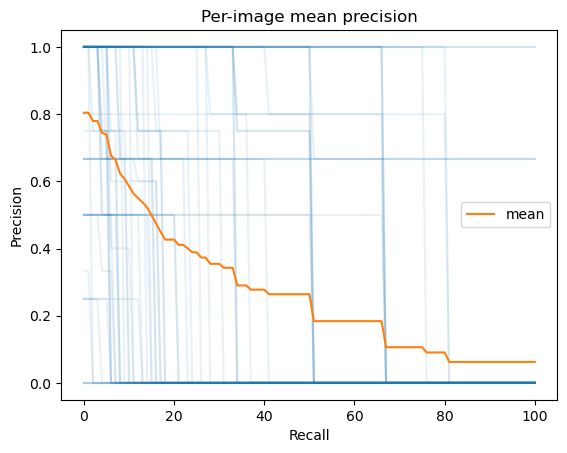

In [164]:
plt.plot(np.array(pr).T,color="C0",alpha=0.1);
plt.plot(np.mean(pr,axis=0),color="C1",label="mean")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Per-image mean precision")
plt.legend()

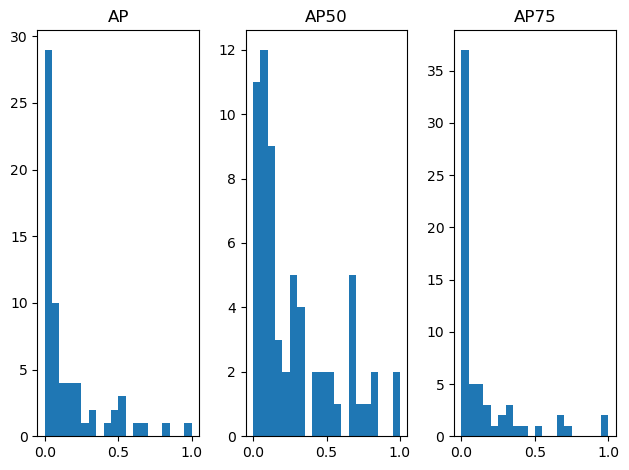

In [133]:
for i,k,v in zip(range(len(out)),out.keys(),out.values()):
    plt.subplot(1,len(out),i+1)
    plt.hist(v,bins=20)
    plt.title(k)
plt.tight_layout()

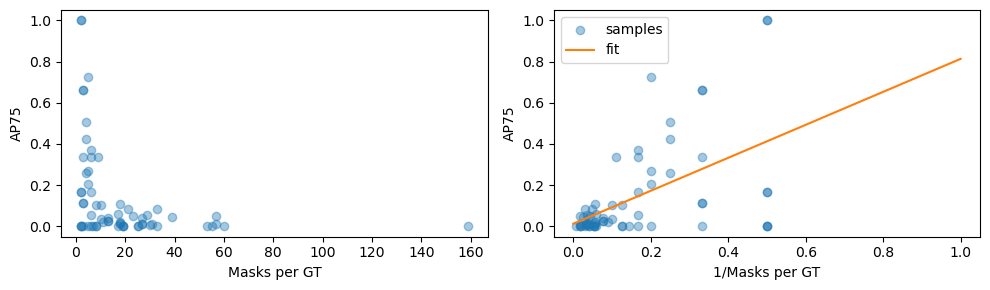

In [180]:
masks_per_gt = np.array([gt.unique().shape[0] for gt in gts]).astype(float)
k = "AP75"
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(masks_per_gt,out[k],alpha=0.4)
plt.ylabel(k)
plt.xlabel("Masks per GT")
plt.subplot(1,2,2)
plt.scatter(masks_per_gt**-1,out[k],alpha=0.4,label="samples")
plt.ylabel(k)
plt.xlabel("1/Masks per GT")
#plot fit line
plt.plot(np.linspace(0,1,100),np.poly1d(np.polyfit(masks_per_gt**-1,out[k],1))(np.linspace(0,1,100)),color="C1",label="fit")
plt.legend()
plt.tight_layout()

# Evaluate Cropformer

## first ver

In [2]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.append('./source/')
from sam import evaluate_sam
from eval_and_plotting import SavedSamples, SavedSamplesManager
import matplotlib.pyplot as plt
import argparse
import torch
import tqdm
import numpy as np
import jlc
from PIL import Image
from pathlib import Path

In [3]:
entity_json = "data/entityseg/info.jsonl"
entity_info = jlc.load_json_to_dict_list(entity_json)
fn_to_didx = {}
for info in entity_info: 
    if info["split_idx"]==2:
        fn_to_didx[info["fn"]] = f"entityseg/{info['i']}"
#first 5
#print({k:fn_to_didx[k] for k in list(fn_to_didx.keys())[:5]})

In [4]:
save_folder = "/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals"
save_paths = [str(item) for item in Path(save_folder).glob("*.pth")]
print("\n".join(save_paths))

/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_cropformer_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA8_cropformer_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_mask2former_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_cropformer_swin_large_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/VAL_DATA_mask2former_swin_large_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat32_mask2former_swin_large_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat32_cropformer_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat

In [36]:
#ssm = SavedSamplesManager()
for save_path in save_paths[2:]:

    setup_name = Path(save_path).stem

    heavy_data = []
    light_data = []
    didx = []

    loaded_eval = torch.load(save_path,weights_only=False)
    for item in loaded_eval:
        fn = "/".join(item["file_name"].split("/")[-2:])
        didx.append(fn_to_didx[fn])
        light_data.append({"scores": item["scores"].cpu()})
        heavy_data.append({"pred_int": item["seg"].cpu()})

    ss = SavedSamples(light_data=light_data,heavy_data=heavy_data,didx=didx)
    ss.recompute_metrics(tqdm_recompute=1)

    ss2 = ss.clone(setup_name)
    ss2.clear_heavy_data()
    ssm.add_saved_samples(ss2)

100%|██████████| 1314/1314 [17:30<00:00,  1.25it/s]


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [37]:
ssm.mean_metric_table()

,VAL_DATA_cropformer_swin_tiny_3x,VAL_DATA_mask2former_swin_tiny_3x,VAL_DATA_cropformer_swin_large_3x,VAL_DATA_mask2former_swin_large_3x
AP,0.492,0.465,0.544,0.52
AP50,0.636,0.609,0.686,0.666
AP75,0.503,0.474,0.559,0.533
ari,0.862,0.856,0.884,0.88
hiou,0.247,0.23,0.293,0.257
iou,0.0357,0.0358,0.0484,0.0403


In [12]:
#postprocess
save_path = save_paths[0]
setup_name = Path(save_path).stem

heavy_data = []
light_data = []
didx = []

loaded_eval = torch.load(save_path,weights_only=False)
for item in loaded_eval:
    fn = "/".join(item["file_name"].split("/")[-2:])
    didx.append(fn_to_didx[fn])
    light_data.append({"scores": item["scores"].cpu()})
    heavy_data.append({"pred_int": item["seg"].cpu().numpy().astype(np.uint8)[None,None]})

ss = SavedSamples(light_data=light_data,heavy_data=heavy_data,didx=didx)
ss.postprocess(postprocess_kwargs={"mode": "min_area","min_area": 0.025},tqdm_recompute=1)


100%|██████████| 1314/1314 [11:19<00:00,  1.93it/s]


In [26]:
save_path = save_paths[1]
setup_name = Path(save_path).stem

heavy_data = []
light_data = []
didx = []

loaded_eval = torch.load(save_path,weights_only=False)
for item in loaded_eval:
    fn = "/".join(item["file_name"].split("/")[-2:])
    didx.append(fn_to_didx[fn])
    light_data.append({"scores": item["scores"].cpu()})
    heavy_data.append({"pred_int": item["seg"].cpu().numpy().astype(np.uint8)})

ss = SavedSamples(light_data=light_data,heavy_data=heavy_data,didx=didx)
# load images and labels
for didx in tqdm.tqdm(ss.didx):
    idx = int(didx.split("/")[1])
    image = torch.from_numpy(np.array(Image.open(f"data/entityseg/f{idx//1000}/{idx}_im.jpg")))
    label = torch.from_numpy(np.array(Image.open(f"data/entityseg/f{idx//1000}/{idx}_la.png")))
    h,w = image.shape[:2]
    assert h==ss.get_heavy_data(didx)[0]["pred_int"].shape[-2]
    assert w==ss.get_heavy_data(didx)[0]["pred_int"].shape[-1]
    ss.heavy_data[ss.didx.index(didx)]["gt"] = label
    ss.heavy_data[ss.didx.index(didx)]["im"] = image
ap = ss.compute_full_ap()



100%|██████████| 8/8 [00:00<00:00, 111.82it/s]


In [27]:
python train.py --model_name entity[sid2][v3][sam_depth_sweep]+nocond
python train.py --model_name entity[sid2][v3_big][sam_h2]+nocond
f

{'AP': 0.29464963969360136,
 'AP50': 0.3997047284629695,
 'AP75': 0.31802301912647035}

In [13]:
ssm = SavedSamplesManager(ss)
ssm.mean_metric_table()

,unnamed
AP,0.397
AP50,0.476
AP75,0.41
ari,0.809
hiou,0.436
iou,0.1


In [8]:
jlc.shaprint(ss.heavy_data[0])

{'pred_int': 'torch.Size([753, 1333])'}


In [13]:
# load images and labels
for didx in tqdm.tqdm(ss.didx):
    idx = int(didx.split("/")[1])
    image = torch.from_numpy(np.array(Image.open(f"data/entityseg/f{idx//1000}/{idx}_im.jpg")))
    label = torch.from_numpy(np.array(Image.open(f"data/entityseg/f{idx//1000}/{idx}_la.png")))
    h,w = image.shape[:2]
    assert h==ss.get_heavy_data(didx)[0]["pred_int"].shape[-2]
    assert w==ss.get_heavy_data(didx)[0]["pred_int"].shape[-1]
    ss.heavy_data[ss.didx.index(didx)]["gt"] = label
    ss.heavy_data[ss.didx.index(didx)]["im"] = image

100%|██████████| 8/8 [00:00<00:00, 100.00it/s]


In [12]:
ss.get_heavy_data(didx)[0]["pred_int"].shape

torch.Size([1, 1, 1086, 800])

In [33]:
import torch
from torch.utils.data import Dataset, DataLoader
from multiprocessing import Value

class MyDataset(Dataset):
    def __init__(self):
        self.shared_flag = Value('b', False)

    def __getitem__(self, idx):
        if self.shared_flag.value:
            # use new behavior
            return f"New behavior at index {idx}"
        else:
            # use default behavior
            return f"Default behavior at index {idx}"

    def __len__(self):
        return 100

# Create a shared boolean flag
option1_flag = Value('b', False)  # 'b' = signed char, i.e. boolean

dataset = MyDataset()
dataloader = DataLoader(dataset, batch_size=4, num_workers=4)

# Later, you can change the behavior across all workers like:
dataloader.dataset.shared_flag.value = True 

print(next(iter(dataloader)))

dataloader.dataset.shared_flag.value = False

print(next(iter(dataloader)))

['New behavior at index 0', 'New behavior at index 1', 'New behavior at index 2', 'New behavior at index 3']
['Default behavior at index 0', 'Default behavior at index 1', 'Default behavior at index 2', 'Default behavior at index 3']


python train.py --model_name entity[sid2][v3][sam_depth_sweep]+nocond --mode load --ckpt_name "04-05-10-26_entity[sid2][v3][sam_depth_sweep]+nocond_2_(image_encoder_depth=1)" --image_encoder_depth 1 --gen_interval 100 --seed 14

python sample.py --name_match_str "04-05-10-26_entity[sid2][v3][sam_depth_sweep]+nocond_2_(image_encoder_depth=1)" --seed 0 --gen_setup train

In [4]:
python train.py --model_name entity[sid2][v3][sam_h3]+nocond
python train.py --model_name entity[sid2][v3][sam_h3]+nocond --image_encoder sam2_t 
python train.py --model_name entity[sid2][v3_big][sam_h3]+nocond
f

SyntaxError: invalid syntax (1470413923.py, line 1)

In [ ]:
python train.py --model_name entity[sid2][v3][sam_h2]+nocond --num_channels 64 --aug_prob_multiplier 0.0
python train.py --model_name entity[sid2][v3_big][sam_h2]+nocond --aug_prob_multiplier 0.0 
f

In [4]:
p1 = "/home/jloch/Desktop/diff/diffusion2/saves/ver-1.4.5/04-13-20-14_entity[sid2][v3_big][sam_h2]+nocond_4/args.json"
p2 = "/home/jloch/Desktop/diff/diffusion2/saves/ver-1.4.5/04-17-07-49_entity[sid2][v3_big][sam_h3]+nocond_0/args.json"

import jlc

args1 = jlc.load_json_to_dict_list(p1)[0]
args2 = jlc.load_json_to_dict_list(p2)[0]

all_keys = set(args1.keys()).union(set(args2.keys()))
for k in all_keys:
    val1 = args1.get(k,None)
    val2 = args2.get(k,None)
    if not isinstance(val1,(dict,list)):
        if val1!=val2:
            print(f"{k:20}:{val1},{val2}")


image_encoder       :sam_vit_h,sam1_h
num_channels        :96,64
model_id            :entity[sid2][v3_big][sam_h2]+nocond_4,entity[sid2][v3_big][sam_h3]+nocond_0
seed                :33977,4541
gen_setups          :entopt[vali],entopt[train],entopt[vali][sam][w0],entopt[train][sam][w0]
max_iter            :300000,200000
save_path           :saves/ver-1.4.5/04-13-20-14_entity[sid2][v3_big][sam_h2]+nocond_4,saves/ver-1.4.5/04-17-07-49_entity[sid2][v3_big][sam_h3]+nocond_0
model_name          :entity[sid2][v3_big][sam_h2]+nocond,entity[sid2][v3_big][sam_h3]+nocond
aug_prob_multiplier :0.0,1.0


In [ ]:
python sample.py --name_match_str 03-03-16-20_entity[sid2][v3_big]* --gen_setup entopt[sam][1v][all]
python sample.py --name_match_str *entity[sid2][v3_big][sam_h3]* --gen_setup entopt[sam][1v][all]
f

In [ ]:
python sample.py --name_match_str 03-03-16-20_entity[sid2][v3_big]* --gen_setup entopt[sam][1v][pp][all]
python train.py --model_name entity[sid2][v3][sam_h3]+nocond --num_channels 96
python train.py --model_name entity[sid2][v3_big][sam_h3]+nocond --num_channels 96 --mode load --ckpt_name 04-13-20-14_entity[sid2][v3_big][sam_h2]+nocond_4* --lr_warmup_steps 1000
f

## second ver for repeat32

In [1]:
%load_ext autoreload
%autoreload 2
import os,sys
sys.path.append('./source/')
from source.sam import evaluate_sam
from source.eval_and_plotting import SavedSamples, SavedSamplesManager, DiffSamples
import matplotlib.pyplot as plt
import argparse
import torch
import tqdm
import numpy as np
import jlc
from PIL import Image
from pathlib import Path

In [2]:
#create mapper
entity_json = "data/entityseg/info.jsonl"
entity_info = jlc.load_json_to_dict_list(entity_json)
fn_to_didx = {}
for info in entity_info: 
    fn_to_didx[info["fn"]] = f"entityseg/{info['i']}"

In [3]:
#load our saved samples
ssm = SavedSamplesManager()

gen_ids = ["entopt[sam][1v][repeat_didx][save]_0",
           "entopt[sam][1v][repeat_didx][save]_1",
           "entopt[sam][1v][repeat_didx][save]_2"]
names = ["diff128 w/sam",
         "diff256 w/sam",
         "diff256"]
for gen_id,name in zip(gen_ids,names):
    ss = DiffSamples(gen_id=gen_id,is_ambiguous=False)
    ss.load_heavy_data()
    if gen_id==gen_ids[0]:
        ss.load_heavy_image_gt()
    ss.crop_padding()
    ss.apply_to_key("pred_int",lambda x: x[0,0])
    ss.name = name
    ssm.add_saved_samples(ss)

In [20]:
#load and add cropformer/mask2former
save_folder = "/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals"
save_paths = [str(item) for item in Path(save_folder).glob("repeat32_*.pth")]
print("\n".join(save_paths))
for save_path in save_paths:
    if "tiny" in save_path:
        continue
    setup_name = Path(save_path).stem.replace("repeat32_","").replace("swin_large_3x","L").replace("swin_tiny_3x","T")

    heavy_data = []
    light_data = []
    didx = []

    loaded_eval = torch.load(save_path,weights_only=False)
    for item in loaded_eval:
        fn = "/".join(item["file_name"].split("/")[-2:])
        didx.append(fn_to_didx[fn])
        light_data.append({"scores": item["scores"].cpu()})
        heavy_data.append({"pred_int": item["seg"].cpu().numpy().astype(np.uint8)})

    ss = SavedSamples(light_data=light_data,heavy_data=heavy_data,didx=didx,name=setup_name)
    ssm.add_saved_samples(ss)

/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat32_mask2former_swin_large_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat32_cropformer_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat32_mask2former_swin_tiny_3x.pth
/home/jloch/miniconda3/envs/p38-env/lib/python3.8/site-packages/detectron2/save_full_evals/repeat32_cropformer_swin_large_3x.pth


In [21]:
#load sam samples
ss = SavedSamples()
ss.load("./saves/sam_eval/sam1_h_entity_repeat32.pt")
ss.name = "sam1_h"
jlc.shaprint(ss.heavy_data[0])
ssm.add_saved_samples(ss)

{'gt': 'torch.Size([750, 1333, 1])',
 'image': 'torch.Size([750, 1333, 3])',
 'pred_int': 'torch.Size([750, 1333])'}


In [22]:
postprocess = False
for i in range(len(ssm)):
    print(ssm.saved_samples[i].name)
    print(ssm.saved_samples[i].heavy_data[0]["pred_int"].shape)
    if postprocess:
        postprocess_kwargs = {"mode": "min_area","min_area": 0.025}
    else:
        postprocess_kwargs = {}
    ssm.saved_samples[i].postprocess(postprocess_kwargs=postprocess_kwargs,tqdm_recompute=1,recompute_metrics=1)

diff128 w/sam
torch.Size([72, 128])


100%|██████████| 32/32 [00:19<00:00,  1.64it/s]


diff256 w/sam
torch.Size([144, 256])


100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


diff256
torch.Size([144, 256])


100%|██████████| 32/32 [00:19<00:00,  1.67it/s]


mask2former_L
torch.Size([800, 1067])


100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


cropformer_L
torch.Size([800, 1067])


100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


sam1_h
torch.Size([750, 1333])


100%|██████████| 32/32 [00:18<00:00,  1.78it/s]


In [23]:
len(ssm.intersection_didx())

32

In [9]:
didx_per_split = {0: [],1: [],2: []}
for didx in ssm.intersection_didx():
    split_idx = entity_info[int(int(didx.split("/")[1]))]["split_idx"]
    didx_per_split[split_idx].append(didx)
print(didx_per_split)

{0: ['entityseg/11580', 'entityseg/5711', 'entityseg/11149', 'entityseg/11295', 'entityseg/21645', 'entityseg/4045', 'entityseg/27972', 'entityseg/24559', 'entityseg/22166', 'entityseg/13304', 'entityseg/13481', 'entityseg/16365', 'entityseg/14600', 'entityseg/12161'], 1: [], 2: ['entityseg/33016', 'entityseg/32561', 'entityseg/32148', 'entityseg/32604', 'entityseg/32090', 'entityseg/32661', 'entityseg/32098', 'entityseg/32284', 'entityseg/33182', 'entityseg/32736', 'entityseg/31963', 'entityseg/33028', 'entityseg/33195', 'entityseg/31988', 'entityseg/32407', 'entityseg/32097', 'entityseg/32598', 'entityseg/32933']}


In [24]:
t0 = ssm.mean_metric_table(intersection_only=didx_per_split[0])

In [25]:
t2 = ssm.mean_metric_table(intersection_only=didx_per_split[2])

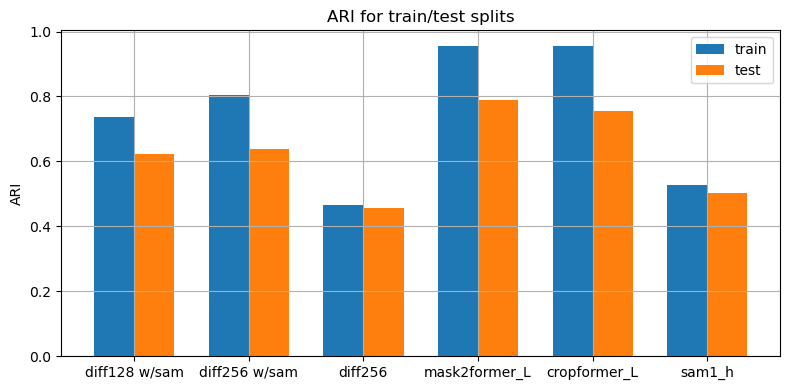

In [49]:
plt.figure(figsize=(8,4))
a,b = t0.loc["ari"].values.astype(float),t2.loc["ari"].values.astype(float)
names = t0.columns.values
bar_width = 0.35
x = np.arange(len(names))
plt.bar(x-bar_width/2,a,bar_width,label="train",color="C0")
plt.bar(x+bar_width/2,b,bar_width,label="test",color="C1")
plt.xticks(x,names)
plt.ylabel("ARI")
plt.legend()
plt.title("ARI for train/test splits")
plt.grid()
plt.tight_layout()


In [46]:
%matplotlib inline

In [16]:
%matplotlib qt5
#didx = ssm.intersection_didx()[24:]
didx = didx_per_split[2][:9]
plt.imshow(ssm.plot_qual_seg(didx=didx,seed=0,resize_width=256))
jlc.zoom()

In [13]:
%matplotlib qt5
plt.imshow(ssm.plot_qual_seg(didx=didx_per_split[2][:6],seed=0,resize_width=256))
jlc.zoom()

In [51]:
#save figs
s1 = "/home/jloch/Downloads/qual_repeat_entity_front6.png"
s2 = "/home/jloch/Downloads/qual_repeat_entity_middle6.png"
s3 = "/home/jloch/Downloads/qual_repeat_entity_back6.png"
Image.fromarray(ssm.plot_qual_seg(didx=didx_per_split[2][:6],seed=0,resize_width=256)).save(s1)
Image.fromarray(ssm.plot_qual_seg(didx=didx_per_split[2][6:12],seed=0,resize_width=256)).save(s2)
Image.fromarray(ssm.plot_qual_seg(didx=didx_per_split[2][-6:],seed=0,resize_width=256)).save(s3)

In [52]:
ssm.mean_metric_table()

,diff128 w/sam,diff256 w/sam,diff256,mask2former_L,cropformer_L,sam1_h
AP,0.0988,0.0918,0.0207,0.619,0.637,0.109
AP50,0.16,0.142,0.0372,0.72,0.76,0.227
AP75,0.101,0.093,0.0185,0.653,0.658,0.0987
ari,0.672,0.712,0.461,0.862,0.843,0.513
hiou,0.172,0.152,0.0639,0.316,0.332,0.103
iou,0.00177,0.00308,0.00463,0.0303,0.0287,0.00368


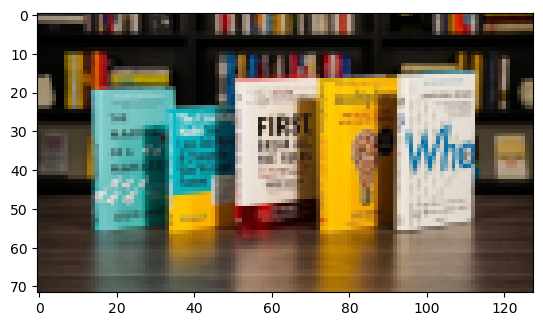

In [8]:
plt.imshow(ssm.saved_samples[0].heavy_data[0]["image"])

In [22]:
ims,gts = ssm.get_image_gt(didx_per_split[2])

print([im.shape for im in ims])

[(750, 1333, 3), (800, 1200, 3), (800, 1200, 3), (806, 800, 3), (800, 1203, 3), (800, 1120, 3), (800, 1122, 3), (800, 1199, 3), (800, 1067, 3), (1067, 800, 3), (800, 1201, 3), (800, 800, 3), (800, 1045, 3), (800, 1201, 3), (800, 800, 3), (800, 1200, 3), (1067, 800, 3), (800, 1202, 3)]


(-0.5, 1199.5, 799.5, -0.5)

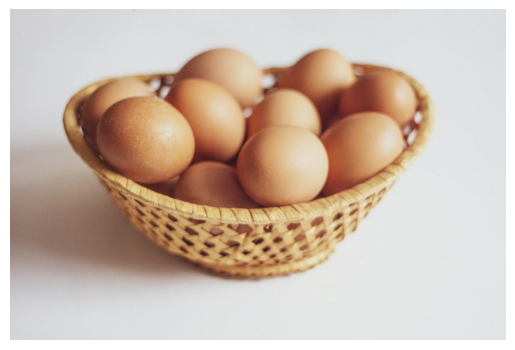

In [27]:
%matplotlib inline
plt.imshow(ims[15])
plt.axis("off")

In [26]:
from pathlib import Path
import jlc

args = []
for f in Path("./saves/HPC_saves/super_longs").glob("*/*.json"):
    args.append(jlc.load_json_to_dict_list(str(f))[0])

In [38]:
all_keys = set()
for arg in args:
    all_keys = all_keys.union(set(arg.keys()))
for k in all_keys:
    vals = [arg[k] for arg in args if k in arg]
    if not isinstance(vals[0],list):
        if len(set(vals))>1:
            print(f"{k:20}:{vals}") 

mode                :['new', 'cont', 'cont', 'new']
seed                :[50382, 12888, 13617, 45460]
model_id            :['lidcv8[super_long][gen_prob_arch][rare_gen]_0', 'lidcv8[super_long][gen_prob_arch][aug64][rare_gen]_0', 'lidcv8[super_long][rare_gen]_0', 'lidcv8[super_long][aug64][rare_gen]_0']
use_gen_prob_unet   :[True, True, False, False]
crop_method         :['sam_small', 'sam_lidc64', 'sam_small', 'sam_lidc64']
ckpt_name           :['', 'saves/ver-1.4.3/01-29-19-20_lidcv8[super_long][gen_prob_arch][aug64][rare_gen]_0/ckpt_170000.pt', 'saves/ver-1.4.3/01-28-17-24_lidcv8[super_long][rare_gen]_0/ckpt_330000.pt', '']
image_size          :[128, 64, 128, 64]
model_name          :['lidcv8[super_long][gen_prob_arch][rare_gen]', 'lidcv8[super_long][gen_prob_arch][aug64][rare_gen]', 'lidcv8[super_long][rare_gen]', 'lidcv8[super_long][aug64][rare_gen]']


TypeError: unhashable type: 'dict'

In [40]:
p="/home/jloch/Desktop/diff/amb_diff_seg/amb_diff_seg_repo/data/data_lidc.pickle"

import numpy as np
import pickle

loaded_data = pickle.load(open(p,"rb"))
print(len(loaded_data.keys()))

15096


In [42]:
print(list(loaded_data.keys())[-10:])

['208376669554572460085205852204_slice32lesion1', '208376669554572460085205852204_slice32lesion2', '208376669554572460085205852204_slice33lesion1', '208376669554572460085205852204_slice33lesion2', '208376669554572460085205852204_slice31lesion1', '208376669554572460085205852204_slice31lesion2', '208376669554572460085205852204_slice30lesion1', '208376669554572460085205852204_slice30lesion2', '267495169884268604035801498197_slice13lesion1', '267495169884268604035801498197_slice13lesion2']


In [45]:
jlc.shaprint(loaded_data["208376669554572460085205852204_slice30lesion2"])

{'image': 'np.Size([128, 128])',
 'masks': ['np.Size([128, 128])',
           'np.Size([128, 128])',
           'np.Size([128, 128])',
           'np.Size([128, 128])'],
 'pixel_spacing': '<MultiValue>len2',
 'series_uid': '<UID>len64'}


In [100]:
p = "saves/HPC_saves/super_longs/01-28-17-24_lidcv8[super_long][rare_gen]_0/ckpt_400000.pt"
import torch
ckpt = torch.load(p,weights_only=False)
ckpt.keys()

dict_keys(['step', 'model', 'optimizer', 'log_loss_scale', 'best_metric', 'ema_0.9999'])

In [101]:
ckpt2 = {}
for k in ["step","model"]:
    ckpt2[k] = ckpt[k]
ckpt2["losses"] = {"train": [],"vali": []}
ckpt2["config"] = "/configs/config.yaml"

p2 = "/home/jloch/Desktop/diff/amb_diff_seg/amb_diff_seg_repo/models/default_ckpt.pt"
torch.save(ckpt2,p2)

In [89]:
p3 = "/home/jloch/Desktop/diff/amb_diff_seg/amb_diff_seg_repo/models/eval_64.pt"

loaded = torch.load(p3,weights_only=False)

loaded.keys()

dict_keys(['image_ids', 'images', 'preds', 'gts', 'mean_metrics', 'metrics'])

In [129]:
p = "/home/jloch/Desktop/diff/amb_diff_seg/amb_diff_seg_repo/saves_training/default.pt"
loaded = torch.load(p,weights_only=False)
loaded.keys()

dict_keys(['step', 'model', 'seed', 'optimizer', 'log_loss_scale', 'config', 'metrics'])

In [123]:
loaded["seed"]

0

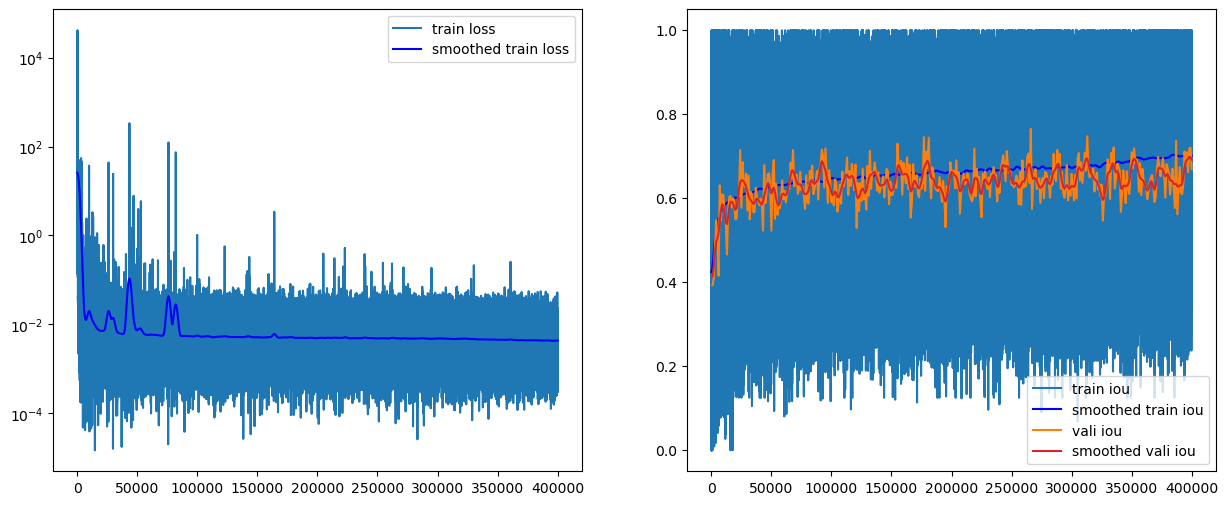

In [139]:
from scipy.ndimage import gaussian_filter1d

train_steps = []
train_loss = []
train_iou = []
vali_iou = []
vali_steps = []
for k,v in loaded["metrics"]["train"].items():
    train_steps.append(k)
    train_loss.append(v["loss"])
    train_iou.append(v["iou"])
for k,v in loaded["metrics"]["vali"].items():
    vali_steps.append(k)
    vali_iou.append(v["iou"])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(train_steps,train_loss,label="train loss",color="C0")
plt.plot(train_steps,gaussian_filter1d(train_loss,sigma=len(train_loss)/300),label="smoothed train loss",color="blue")
plt.yscale("log")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_steps,train_iou,label="train iou",color="C0")
plt.plot(train_steps,gaussian_filter1d(train_iou,sigma=len(train_iou)/300),label="smoothed train iou",color="blue")
plt.plot(vali_steps,vali_iou,label="vali iou",color="C1")
plt.plot(vali_steps,gaussian_filter1d(vali_iou,sigma=len(vali_iou)/300),label="smoothed vali iou",color="C3")
plt.legend()
plt.show()

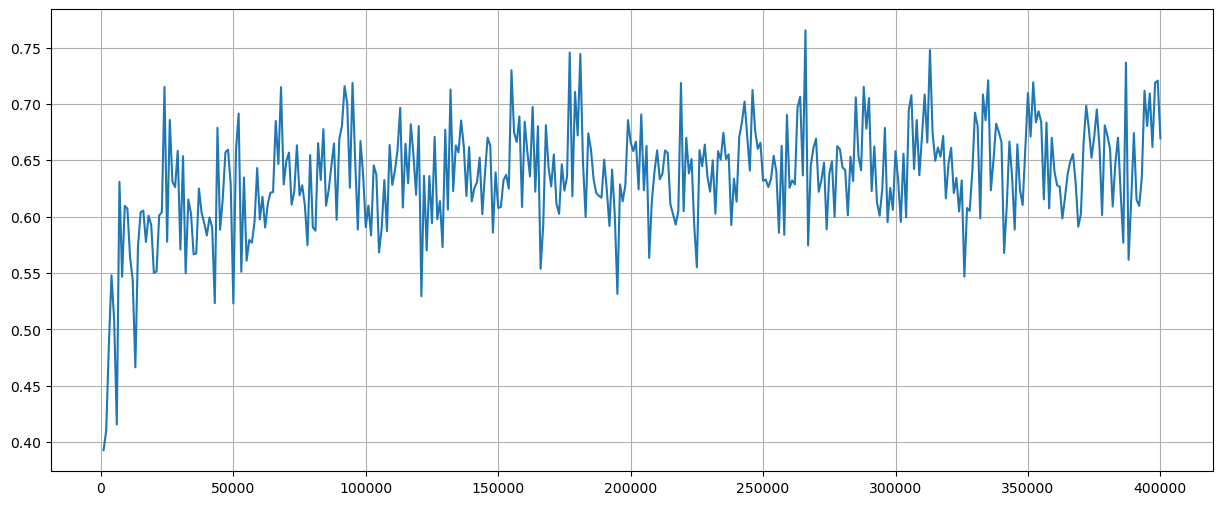

In [133]:
plt.figure(figsize=(15,6))
plt.plot(vali_steps,vali_iou,label="validation iou")
plt.grid()

(-0.5, 1039.5, 389.5, -0.5)

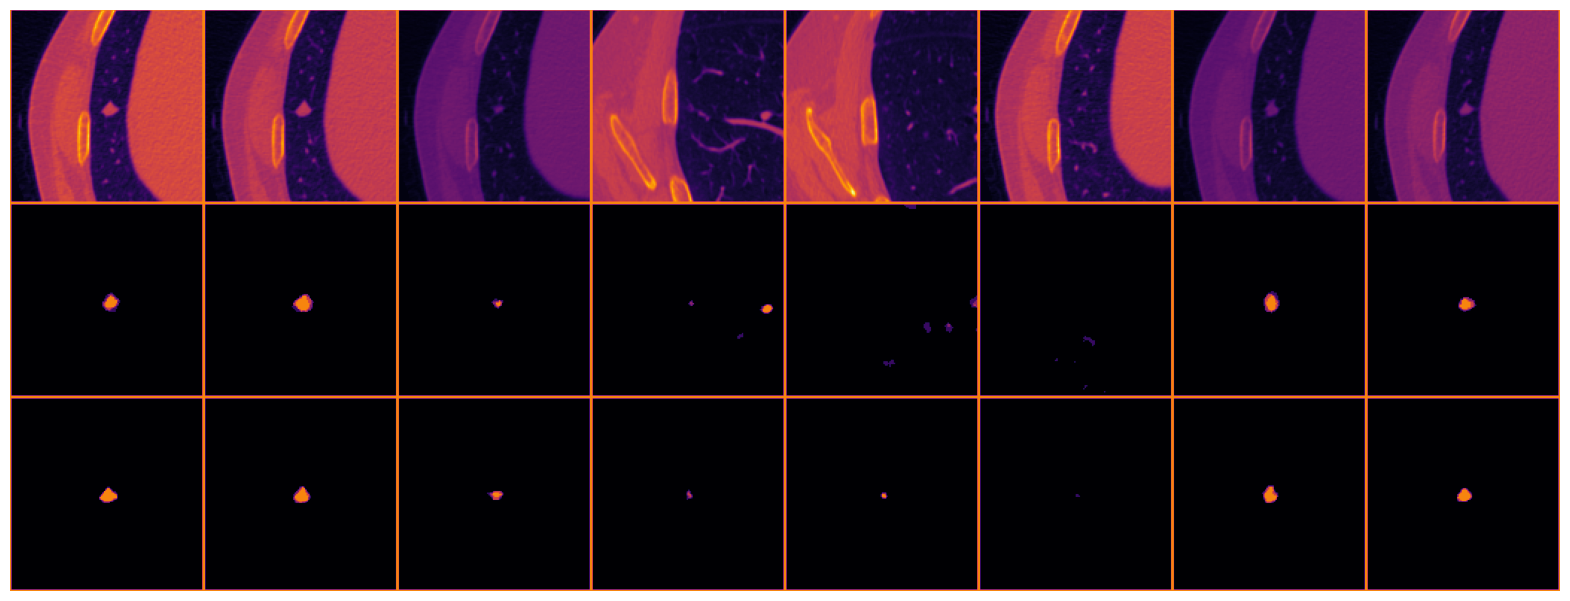

In [99]:
import matplotlib.pyplot as plt

n_show = 8
do_mean = True
maybe_do_mean = lambda x: [sum(x)/len(x)] if do_mean else x
image = []
for i in range(n_show):
    image.append([loaded["images"][i].numpy().mean(0)/3+0.7])
    image[-1].extend(maybe_do_mean([loaded["preds"][i][:,:,j] for j in range(loaded["preds"][i].shape[2])]))
    image[-1].extend(maybe_do_mean([loaded["gts"][i][:,:,j] for j in range(loaded["gts"][i].shape[2])]))

image = [[np.pad(item,((1,1),(1,1)),mode="constant",constant_values=1) for item in image[i]] for i in range(n_show)]
image = [np.concatenate(image[i],axis=0) for i in range(n_show)]
image = np.concatenate(image,axis=1)

plt.figure(figsize=(20,20))
plt.imshow(image,cmap="inferno")
plt.axis("off")

In [127]:
import os
p = "/home/jloch/Desktop/diff/amb_diff_seg/amb_diff_seg_repo/src"#/amb_seg_diff/train.py"
print(os.path.exists(p))

True


In [125]:
python src/amb_diff_seg/train.py configs/config_default.yaml
python src/amb_diff_seg/train.py configs/config_crop64.yaml
f

True


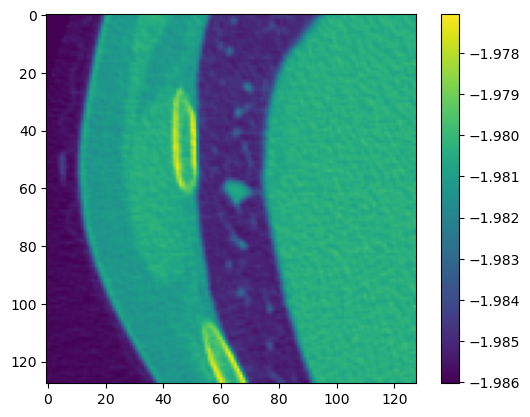

In [ ]:
plt.imshow(loaded["images"][i].numpy().mean(0))

plt.colorbar()

In [ ]:
python sample.py --name_match_str *lidcv8[super_long][aug64][rare_gen]_0 --gen_setup entopt[save][lidc] --num_samples 64

In [ ]:
python sample.py --name_match_str "*/*/01-28-17-24_lidcv8[super_long][rare_gen]_0/ckpt_400000.pt" --gen_id "finals_test4_*" --gen_setup lidc_amb[vali][all][pp2]


([<matplotlib.axis.XTick at 0x790eb525cf80>,
 [Text(1, 0, 'diff'), Text(2, 0, 'repo')])

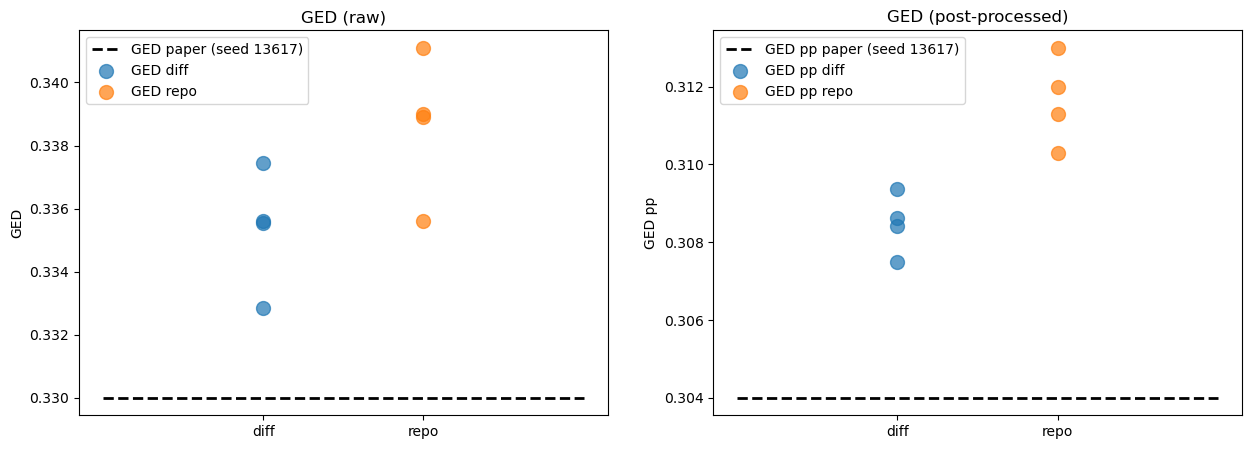

In [153]:
import matplotlib.pyplot as plt
# seed 1,2,3,4
ged_diff = 0.33285,0.33561,0.33555,0.33746
ged_pp_diff = 0.30861,0.30937,0.30748,0.30843
# seed 0,1,2,3
ged_repo = 0.3411,0.3389,0.3356,0.3390
ged_pp_repo = 0.3120,0.3103,0.3113,0.3130

ged_paper = 0.330
ged_pp_paper = 0.304
paper_seed = 13617

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)#GED
plt.title("GED (raw)")
plt.plot([0,3],[ged_paper,ged_paper],"k--",label="GED paper (seed 13617)",linewidth=2)
plt.scatter([1]*len(ged_diff),ged_diff,label="GED diff",color="C0",s=100,alpha=0.7)
plt.scatter([2]*len(ged_repo),ged_repo,label="GED repo",color="C1",s=100,alpha=0.7)
plt.legend()
plt.ylabel("GED")
plt.xticks([1,2],["diff","repo"])

plt.subplot(1,2,2)#GED pp
plt.title("GED (post-processed)")
plt.plot([0,3],[ged_pp_paper,ged_pp_paper],"k--",label="GED pp paper (seed 13617)",linewidth=2)
plt.scatter([1]*len(ged_pp_diff),ged_pp_diff,label="GED pp diff",color="C0",s=100,alpha=0.7)
plt.scatter([2]*len(ged_pp_repo),ged_pp_repo,label="GED pp repo",color="C1",s=100,alpha=0.7)
plt.legend()
plt.ylabel("GED pp")
plt.xticks([1,2],["diff","repo"])


In [151]:
p = "/home/jloch/Desktop/diff/diffusion2/saves/HPC_saves/super_longs/01-28-17-24_lidcv8[super_long][rare_gen]_0/samples/sample_opts.json"
opts = jlc.load_json_to_dict_list(p)
finals_opts = []
for opt in opts:
    if "finals_test4" in opt["gen_id"]:
        finals_opts.append(opt)
print(len(finals_opts))
print([opt["gen_id"] for opt in finals_opts])

8
['finals_test4_0', 'finals_test4_2', 'finals_test4_3', 'finals_test4_4', 'finals_test4_5', 'finals_test4_6', 'finals_test4_7', 'finals_test4_8']


In [152]:
opt1 = finals_opts[0]
opt2 = finals_opts[5]

#print different keys:
all_keys = set(opt1.keys()).union(set(opt2.keys()))
for k in all_keys:
    v1 = opt1.get(k,None)
    v2 = opt2.get(k,None)
    if v1!=v2:
        print(f"{k:20}: {v1}, {v2}")

time                : 2025-02-03-16-17-36-787702, 2025-05-28-09-26-46-722543
pri_didx            : None, 
gen_setup           : lidc_amb[vali][all][pp2], lidc_amb[test][all][pp2]
seed                : 13617, 4
concat_inter_filename: saves/HPC_saves/super_longs/01-28-17-24_lidcv8[super_long][rare_gen]_0/samples/concat_finals_test4_0_400000.png, saves/HPC_saves/super_longs/01-28-17-24_lidcv8[super_long][rare_gen]_0/samples/concat_finals_test4_6_400000.png
gen_id              : finals_test4_0, finals_test4_6
origin              : {'gen_setup': 'commandline', 'gen_id': 'commandline', 'name_match_str': 'commandline', 'num_samples': 'name_versions', 'split': 'modified_args', 'split_method': 'name_versions', 'add_amb_postprocess_metrics': 'name_versions', 'num_votes': 'modified_args'}, {'gen_setup': 'commandline', 'gen_id': 'commandline', 'name_match_str': 'commandline', 'seed': 'commandline', 'num_samples': 'name_versions', 'split': 'name_versions', 'split_method': 'name_versions', 'add_amb_

In [1]:
import torch
print(torch.version.cuda)

12.1


# finding best locataion aware encoding

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


Text(0.5, 1.0, 'Binary Distance Matrix')

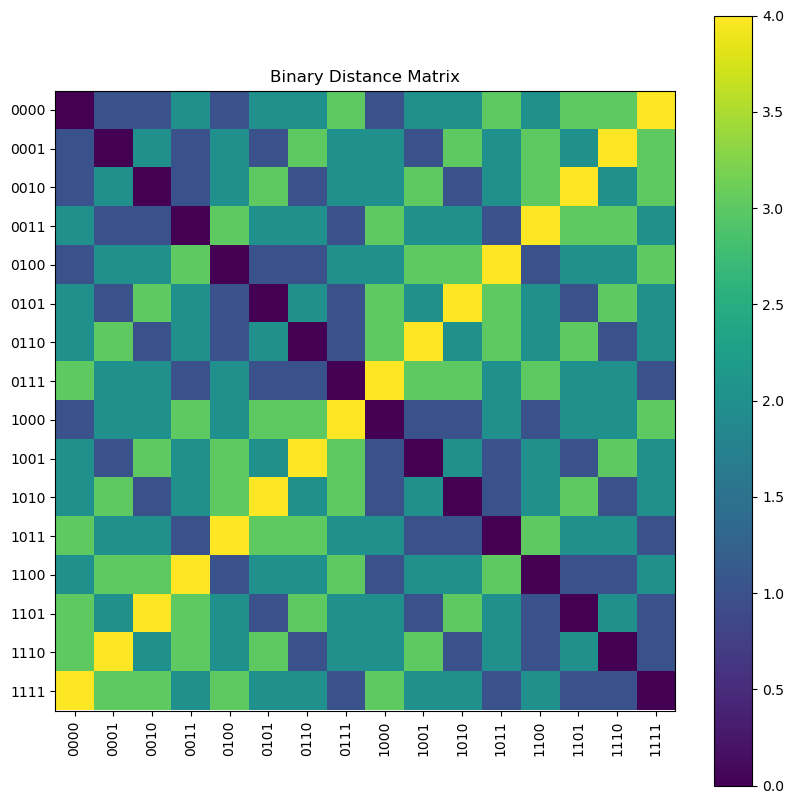

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_bits = 4
bits = list(range(2**n_bits))
#convert to binary
bits = [np.binary_repr(i,width=n_bits) for i in bits]
print(bits)

def binary_dist(b1,b2):
    #count number of bits that are different
    return sum([1 for i in range(len(b1)) if b1[i]!=b2[i]])
#calculate distance matrix
dist_matrix = np.zeros((len(bits),len(bits)))
for i in range(len(bits)):
    for j in range(len(bits)):
        dist_matrix[i,j] = binary_dist(bits[i],bits[j])
plt.figure(figsize=(10,10))
plt.imshow(dist_matrix,cmap="viridis",vmin=0,vmax=n_bits)
plt.colorbar()
plt.xticks(range(len(bits)),bits,rotation=90)
plt.yticks(range(len(bits)),bits)
plt.title("Binary Distance Matrix")

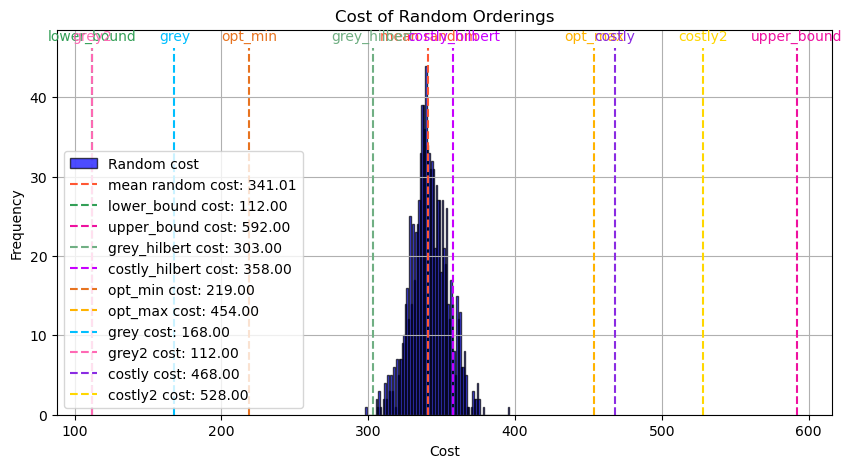

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve
from scipy.optimize import dual_annealing
import numpy as np

def binary_dist(b1,b2):
    #count number of bits that are different
    return sum([1 for i in range(len(b1)) if b1[i]!=b2[i]])

def cost_fun(ordering):
    #calculate cost of ordering
    ordered_bits = [bits[i] for i in ordering]
    h = w = int(np.round(len(ordering)**0.5))
    ordered_bits = np.array(ordered_bits).reshape(h,w)
    cost = 0
    for i in range(h):
        for j in range(w):
            if i<h-1:
                #add distance to next row
                cost += binary_dist(ordered_bits[i,j],ordered_bits[i+1,j])
            if j<w-1:
                #add distance to next column
                cost += binary_dist(ordered_bits[i,j],ordered_bits[i,j+1])
    return cost

def gray_code(n):
    if n == 0:
        return ['']
    prev = gray_code(n - 1)
    return ['0' + code for code in prev] + ['1' + code for code in reversed(prev)]

def hilbert_order(n_bits):
    p = n_bits // 2
    hilbert_curve = HilbertCurve(p, 2)
    coords = [hilbert_curve.point_from_distance(i) for i in range(2**n_bits)]
    indices = np.argsort([x[0] * (2**(p//2)) + x[1] for x in coords])
    return indices

def max_diff_sequence(n_bits,coef2=0):
    all_bits = list(range(2**n_bits))
    sequence = [all_bits.pop(0)]
    while all_bits:
        last = bits[sequence[-1]]
        next_idx = max(all_bits, key=lambda x: binary_dist(last, bits[x]))
        sequence.append(next_idx)
        all_bits.remove(next_idx)
    return sequence

def max_diff_sequence2(n_bits):
    all_indices = list(range(2**n_bits))
    sequence = [all_indices.pop(0)]  # Start with first code (e.g. 0000)

    while all_indices:
        last = bits[sequence[-1]]

        # Step 1: find maximum Hamming distance
        dists = [binary_dist(last, bits[i]) for i in all_indices]
        max_dist = max(dists)
        tied = [i for i, d in zip(all_indices, dists) if d == max_dist]

        if len(tied) == 1:
            best_next = tied[0]
        else:
            # Step 2: break tie by minimizing total cost to remaining codes
            best_next = min(
                tied,
                key=lambda i: sum(binary_dist(bits[i], bits[j]) for j in all_indices if j != i)
            )

        sequence.append(best_next)
        all_indices.remove(best_next)

    return sequence

def opt_min(n_bits):
    def objective(ordering):
        ordering = np.argsort(ordering)
        return cost_fun(ordering)
    bounds = [(0, 1)] * (2**n_bits)
    result = dual_annealing(objective, bounds)
    return np.argsort(result.x)

def opt_max(n_bits):
    def objective(ordering):
        ordering = np.argsort(ordering)
        return -cost_fun(ordering)
    bounds = [(0, 1)] * (2**n_bits)
    result = dual_annealing(objective, bounds)
    return np.argsort(result.x)

def grey_hilbert(n_bits):
    g_codes = gray_code(n_bits)
    int_codes = [int(x, 2) for x in g_codes]
    hilb_idx = hilbert_order(n_bits)
    return np.array(int_codes)[hilb_idx].tolist()

def costly_hilbert(n_bits):
    sequence = max_diff_sequence(n_bits)
    hilb_idx = hilbert_order(n_bits)
    return np.array(sequence)[hilb_idx].tolist()

def grey(n_bits):
    return [int(code, 2) for code in gray_code(n_bits)]

def grey2(n_bits):
    order = [int(code, 2) for code in gray_code(n_bits)]
    h = int(np.round(len(order)**0.5))
    #reverse every second row
    for i in range(h):
        if i % 2 == 1:
            order[i*h:(i+1)*h] = order[i*h:(i+1)*h][::-1]
    return order

def costly(n_bits):
    return max_diff_sequence(n_bits)

def costly2(n_bits):
    order = max_diff_sequence2(n_bits)
    h = int(np.round(len(order)**0.5))
    #reverse every second row
    for i in range(h):
        if i % 2 == 1:
            order[i*h:(i+1)*h] = order[i*h:(i+1)*h][::-1]
    return order

n_bits = 6
bits = list(range(2**n_bits))
#convert to binary
bits = [np.binary_repr(i,width=n_bits) for i in bits]

n_random_sample = 1000
costs = []

for i in range(n_random_sample):
    ordering = np.random.permutation(len(bits))
    cost = cost_fun(ordering)
    costs.append(cost)

plt.figure(figsize=(10,5))
plt.hist(costs,bins=np.arange(min(costs), max(costs)+1, 1), alpha=0.7, color='blue', edgecolor='black', label='Random cost')
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Cost of Random Orderings")
max_y = plt.gca().get_ylim()[1]
mean_cost = np.mean(costs)
tot_conn = (2**(n_bits//2)) * ((2**(n_bits//2)) - 1) * 2
n_op = (2**n_bits)/2
method_dict = {"mean random": mean_cost,
               "lower_bound": tot_conn,
               "upper_bound": n_op * n_bits + (tot_conn - n_op) * (n_bits - 1)
        }

# Define all strategies
strategies = {
    "grey_hilbert": grey_hilbert,
    "costly_hilbert": costly_hilbert,
    "opt_min": opt_min,
    "opt_max": opt_max,
    "grey": grey,
    "grey2": grey2,
    "costly": costly,
    "costly2": costly2,
}

# Evaluate and add to method_dict
for name, func in strategies.items():
    ordering = func(n_bits)
    method_dict[name] = cost_fun(ordering)
#colors with high contrast wrt blue and white
colors = ["#FF5733", "#339F57", "#EE119F", "#70AF83", "#C800FF", "#E77320",
            "#FFB300", "#00BFFF", "#FF69B4", "#8A2BE2", "#FFD700", "#7FFF00"]
k = 0
for method_name, method_cost in method_dict.items():
    col = colors[k % len(colors)]
    plt.plot([method_cost,method_cost],[0,max_y],"--",label=f"{method_name} cost: {method_cost:.2f}", color=col)
    plt.text(method_cost+0.1,max_y*1.02,f"{method_name}", color=col, horizontalalignment="center")
    k += 1
plt.legend()
plt.grid()
plt.show()

In [73]:
import sam2 
print(sam2.__file__)

/home/jloch/Desktop/diff/segment-anything-2/sam2/__init__.py


Text(0.5, 1.0, 'Ordered Bits (Grey2)')

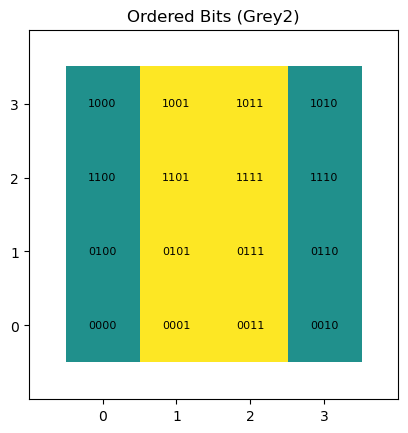

In [58]:
#visualize an ordering
n_bits = 4
imshow_bit_num = 3
ordering = grey2(n_bits)
bits = [np.binary_repr(i, width=n_bits) for i in range(2**n_bits)]
ordered_bits = [bits[i] for i in ordering]
h = w = int(np.round(len(ordering)**0.5))
ordered_bits = np.array(ordered_bits).reshape(h,w)
for i in range(h):
    for j in range(w):
        plt.text(j,i,ordered_bits[i,j],ha="center",va="center",fontsize=8)
if imshow_bit_num>=0:
    im = np.array([[int(bit[imshow_bit_num]) for bit in ordered_bits[i]] for i in range(h)])
    plt.imshow(im,cmap="viridis",vmin=-1,vmax=1)
plt.xticks(range(w), range(w))
plt.yticks(range(h), range(h))
plt.xlim(-1, w)
plt.ylim(-1, h)
plt.title("Ordered Bits (Grey2)")


In [103]:
import numpy as np
from scipy import ndimage
ndimage.center_of_mass(a)
lbl = np.array(([0,1,1,1],
                [0,0,1,1],
                [0,2,1,1],
                [0,0,1,1],
                [0,0,1,1]))
out = ndimage.center_of_mass(np.ones_like(lbl), lbl, np.unique(lbl))
np.array(out)

array([[2.25      , 0.375     ],
       [1.81818182, 2.36363636],
       [2.        , 1.        ]])

In [105]:
order = np.random.rand(2,2)
Y, X = np.indices(order.shape)
X

array([[0, 1],
       [0, 1]])

In [ ]:
import numpy as np
from scipy.ndimage import center_of_mass, gaussian_filter


def binary_dist(b1,b2):
    """counts the number of bits that are different between two binary strings (iterables)"""
    return sum([1 for i in range(len(b1)) if b1[i]!=b2[i]])

def max_sim_ordering(n_bits):
    order = max_diff_sequence(n_bits)
    h = int(np.round(len(order)**0.5))
    #reverse every second row
    for i in range(h):
        if i % 2 == 1:
            order[i*h:(i+1)*h] = order[i*h:(i+1)*h][::-1]
    return order

def max_diff_sequence(n_bits):
    bits = [np.binary_repr(i,width=n_bits) for i in range(2**n_bits)]
    all_bits = list(range(2**n_bits))
    sequence = [all_bits.pop(0)]
    while all_bits:
        last = bits[sequence[-1]]
        next_idx = max(all_bits, key=lambda x: binary_dist(last, bits[x]))
        sequence.append(next_idx)
        all_bits.remove(next_idx)
    return sequence

def gray_code(n):
    if n == 0:
        return ['']
    prev = gray_code(n - 1)
    return ['0' + code for code in prev] + ['1' + code for code in reversed(prev)]

def min_sim_ordering(n_bits):
    order = [int(code, 2) for code in gray_code(n_bits)]
    h = int(np.round(len(order)**0.5))
    #reverse every second row
    for i in range(h):
        if i % 2 == 1:
            order[i*h:(i+1)*h] = order[i*h:(i+1)*h][::-1]
    return order

class LocationAwarePalette:
    def __init__(self,
                max_num_classes,
                image_size,
                padding_idx=255,
                mode="min_sim"):
        assert mode in ["random","min_sim","max_sim"], "mode must be one of ['random','min_sim','max_sim'], got "+mode
        assert (np.log2(max_num_classes)/2).is_integer(), "max_num_classes must be an even power of 2 (:=2^(2k)), got "+str(max_num_classes)
        
        self.max_num_classes = max_num_classes
        self.num_bits = int(np.log2(max_num_classes))
        self.sidelength = int(np.sqrt(max_num_classes))
        self.image_size = image_size
        self.padding_idx = padding_idx
        if mode=="random":
            self.order = np.random.permutation(max_num_classes)
        elif mode=="min_sim":
            self.order = min_sim_ordering(self.num_bits)
        elif mode=="max_sim":
            self.order = max_sim_ordering(self.num_bits)
        self.order = np.array(self.order).reshape((self.sidelength,self.sidelength))

    def apply_lap(self, labels):
        mapping = self.mapping_from_labels(labels)
        mapping[self.padding_idx] = self.padding_idx  # ensure padding index is preserved
        #apply with vectorized operation
        labels_flat = labels.flatten()
        mapped_labels = np.vectorize(mapping.get)(labels_flat)
        return mapped_labels.reshape(labels.shape)

    def mapping_from_labels(self,labels):
        assert len(labels.shape)==2, "labels must be of shape (H,W), got "+str(labels.shape)
        assert labels.shape[0]==labels.shape[1], "labels must be square, got "+str(labels.shape)
        assert labels.shape[0]==self.image_size, "labels must be of shape (image_size,image_size), got "+str(labels.shape)+" for image_size="+str(self.image_size)
        uq_labels = list(np.unique(labels))
        uq_labels = [i for i in uq_labels if i>=0 and i!=self.padding_idx]
        centers = center_of_mass(np.ones_like(labels), labels, uq_labels)
        centers = np.array(centers)
        #map -0.5 to 0 and image_size+0.5 to 1
        centers = (centers + 0.5) / self.image_size
        return self.mapping_from_centers(centers,uq_labels)
    
    def mapping_from_centers(self,centers,indices):
        assert len(centers.shape)==2, "centers must be of shape (N,2), got "+str(centers.shape)
        assert centers.shape[1]==2, "centers must be of shape (N,2), got "+str(centers.shape)
        assert centers.min()>= 0, "Centers must be in the range [0,1] for relative coordinates, got "+str(centers.min())
        assert centers.max()<= 1, "Centers must be in the range [0,1] for relative coordinates, got "+str(centers.max())
        assert len(centers)<=self.max_num_classes, "centers must not exceed max_num_classes, got "+str(len(centers))+" for max_num_classes="+str(self.max_num_classes)
        centers = centers * self.sidelength - 0.5
        centers_rounded = np.round(centers).astype(int)
        print(centers,centers_rounded)
        sampled = self.order[centers_rounded[:,0],centers_rounded[:,1]]
        #handle overlaps:
        if len(sampled)>len(np.unique(sampled)):
            #loop through all centers that are not unique. Ignore the first one.
            #assign all subsequent centers to the nearest unused class in L2 distance
            mask = np.zeros_like(self.order, dtype=bool)
            sampled = []
            Y, X = np.indices(self.order.shape)
            for i in range(len(centers_rounded)):
                idx_r = centers_rounded[i,0],centers_rounded[i,1]
                idx = centers[i,0],centers[i,1]
                if mask[idx_r]:
                    #find the nearest unused class and use it instead of the current one
                    distances = np.sqrt((X - idx[1])**2 + (Y - idx[0])**2)
                    unused_classes = np.where(~mask.flatten())[0]
                    nearest_unused_class = unused_classes[np.argmin(distances.flatten()[unused_classes])]
                    sampled.append(self.order.flatten()[nearest_unused_class])
                    nearest_unused_class_2d = np.unravel_index(nearest_unused_class, self.order.shape)
                    mask[nearest_unused_class_2d] = True
                else:
                    sampled.append(self.order[idx_r])
                    mask[idx_r] = True    

        mapping = {k: v for k,v in zip(indices,sampled)}
        return mapping
    
num_bits = 4
pal = LocationAwarePalette(max_num_classes=2**num_bits,image_size=64,mode="min_sim")

from scipy.ndimage import zoom
#labels = np.arange(16).reshape((4,4))
#labels = zoom(labels, (64/4, 64/4), order=0)

Y,X = np.indices((64,64))
labels = (((Y-31.5)/32)**2 + ((X-31.5)/32)**2)*4
labels = labels.astype(int)

centers = pal.mapping_from_labels(labels)
print(centers)
centers = pal.mapping_from_centers(np.array([[0.5,0.5],[0.2,0.8]]),[0,1])
print(centers)




[[1.5 1.5]
 [1.5 1.5]
 [1.5 1.5]
 [1.5 1.5]
 [1.5 1.5]
 [1.5 1.5]
 [1.5 1.5]
 [1.5 1.5]] [[2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]
[[2.12132034 1.58113883 1.58113883 2.12132034]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [2.12132034 1.58113883 1.58113883 2.12132034]]
[[2.12132034 1.58113883 1.58113883 2.12132034]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [2.12132034 1.58113883 1.58113883 2.12132034]]
[[2.12132034 1.58113883 1.58113883 2.12132034]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [2.12132034 1.58113883 1.58113883 2.12132034]]
[[2.12132034 1.58113883 1.58113883 2.12132034]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [2.12132034 1.58113883 1.58113883 2.12132034]]
[[2.12132034 1.58113883 1.58113883 2.12132034]
 [1.58113883 0.70710678 0.70710678 1.58113883]
 [1.

In [67]:
print(pal.order)

[[ 0  1  3  2]
 [ 4  5  7  6]
 [12 13 15 14]
 [ 8  9 11 10]]


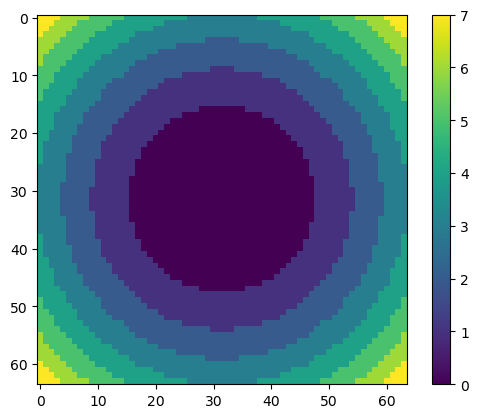

In [60]:
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

"""labels = np.arange(16).reshape((4,4))
labels = zoom(labels, (64/4, 64/4), order=0)
"""

Y,X = np.indices((64,64))
labels = (((Y-31.5)/32)**2 + ((X-31.5)/32)**2)*4
labels = labels.astype(int)
plt.imshow(labels,cmap="viridis")
plt.colorbar()

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt
import os,sys
sys.path.append('./source/')
import matplotlib.pyplot as plt
from source.utils.mixed import set_random_seed, apply_mask
from source.utils.dataloading import get_dataset_from_args
from source.utils.plot import (visualize_dataset_with_labels, 
                              visualize_batch,visualize_cond_batch,
                              mask_overlay_smooth,imagenet_preprocess)
from source.utils.argparsing import TieredParser
import argparse
import torch
import numpy as np
import jlc
from PIL import Image
#find a plot average color of labels
modified_args={"diff_channels": 4,
                "dl_num_workers": 0,
                "semantic_dl_prob": 0,
                "seed": 2,
                "train_batch_size": 512,
                "image_size": 64,
                "imagenet_norm": 1,
                "datasets": "entityseg",
                "lap_mode": "min_sim",}
args = TieredParser().get_args(alt_parse_args=["--model_name","entityv3"],modified_args=modified_args)
dli = get_dataset_from_args(args,split="train",return_type="dli")

batch = next(dli)

print(batch[0].shape)


processing dataset:  entityseg
torch.Size([512, 1, 64, 64])


In [9]:
nonpad_mask = batch[0][:,0] != 255
mask_sum = nonpad_mask.float().sum(0).numpy()
plt.imshow(mask_sum,cmap="viridis")
plt.colorbar()

In [17]:

has_column = nonpad_mask[:,0].sum(0).numpy()
has_row = nonpad_mask[:,:,0].sum(0).numpy()
plt.figure(figsize=(10,5))
plt.plot(has_column,label="has column",linewidth=5)
plt.plot(has_row,label="has row",linewidth=5)
plt.legend()
plt.ylim(0,None)

(0.0, 529.9)

In [26]:
nonpad_mask = batch[0][:,0] != 255
mask_sum = nonpad_mask.float().sum(0).numpy()
plt.imshow((batch[0][:,0].float()*nonpad_mask).sum(0).numpy()/mask_sum,cmap="viridis")
plt.colorbar()

In [27]:
nonpad_mask.shape

torch.Size([512, 64, 64])

In [34]:
mode_image = np.zeros_like(mask_sum)
hw = mask_sum.shape[-1]

for i in range(hw):
    for j in range(hw):
        vec = batch[0][nonpad_mask[:,i,j],:,i,j]
        mode_image[i,j] = torch.mode(vec,dim=0)[0].item()

plt.imshow(mode_image,cmap="viridis")
plt.colorbar()

In [39]:
p1 = "/home/jloch/Desktop/diff/diffusion2/saves/ver-1.4.5/06-18-15-08_entityv3_2/args.json"
p2 = "/home/jloch/Desktop/diff/diffusion2/saves/ver-1.4.5/07-04-13-57_entityv3[lap_sweep][skipm]_0_(lap_mode=max_sim)/args.json"

args1 = jlc.load_json_to_dict_list(p1)[0]
args2 = jlc.load_json_to_dict_list(p2)[0]
all_keys = set(args1.keys()).union(set(args2.keys()))
for k in all_keys:
    v1 = args1.get(k,None)
    v2 = args2.get(k,None)
    if v1!=v2:
        print(f"{k:20}: {v1}, {v2}")

training_history    : ['event=new, step=0, time=2025-06-18-15-08-21-011254', 'event=finished, step=300001, time=2025-06-19-12-23-55-354131'], ['event=new, step=0, time=2025-07-04-13-57-14-684918', 'event=restart, step=251157, time=2025-07-05-00-55-57-870373', 'event=cont, step=250000, time=2025-07-05-00-56-00-541719', 'event=finished, step=300001, time=2025-07-05-03-05-08-287181']
save_path           : saves/ver-1.4.5/06-18-15-08_entityv3_2, saves/ver-1.4.5/07-04-13-57_entityv3[lap_sweep][skipm]_0_(lap_mode=max_sim)
mode                : new, cont
gen_setups          : entopt[vali][25ts],entopt[25ts], entopt[vali][25ts],entopt[train][25ts]
model_id            : entityv3_2, entityv3[lap_sweep][skipm]_0
model_name          : entityv3, entityv3[lap_sweep][skipm]
lap_mode            : none, max_sim
origin              : {'model_name': 'commandline'}, {'model_name': 'commandline', 'lap_mode': 'modified_args', 'skip_train_segment_metrics': 'name_versions'}
skip_train_segment_metrics: None, T

In [ ]:
python train.py --model_name entityv3[lap_sweep][skipm]
python train.py --model_name entityv3[short][onehot_sweep][skipm]
python train.py --model_name entityv3[short][onehot_sweep_acts][skipm]
f

In [ ]:
entityv3[sigmoid_sweep2] --loss_weights sigmoid_-4; --predict x;
entityv3[sigmoid_sweep2] --loss_weights sigmoid_-4; --predict v;
entityv3[pred_lw_sweep] --loss_weights SNR; --predict x;
entityv3[pred_lw_sweep] --loss_weights SNR_plus1; --predict x;
entityv3[pred_lw_sweep] --loss_weights SNR_trunc; --predict x;
entityv3[pred_lw_sweep] --loss_weights uniform; --predict x;
entityv3[pred_lw_sweep] --loss_weights SNR; --predict v;
entityv3[pred_lw_sweep] --loss_weights SNR_plus1; --predict v;
entityv3[pred_lw_sweep] --loss_weights SNR_trunc; --predict v;
entityv3[pred_lw_sweep] --loss_weights uniform; --predict v;
entityv3[pred_lw_sweep] --loss_weights SNR; --predict eps;
entityv3[pred_lw_sweep] --loss_weights SNR_plus1; --predict eps;
entityv3[pred_lw_sweep] --loss_weights SNR_trunc; --predict eps;
entityv3[pred_lw_sweep] --loss_weights uniform; --predict eps;
entityv3[input_scale_sweep] --input_scale 1.0;
entityv3[input_scale_sweep] --input_scale 0.3;
entityv3[input_scale_sweep] --input_scale 0.1;
entityv3[input_scale_sweep] --input_scale 0.03;
entityv3[input_scale_sweep] --input_scale 0.01;
entityv3[input_scale_sweep] --input_scale 0.003;

#extras
entityv3[sigmoid_sweep2] --loss_weights sigmoid_-4; --predict eps;


In [ ]:
entityv3[short][sigmoid_sweep][skipm] --loss_weights sigmoid_-8;sigmoid_-6;sigmoid_-4
entityv3[short][pred_lw_sweep][skipm] --loss_weights SNR;

In [ ]:
python sample.py --gen_setup entopt[vali][all][1v][25ts][512] --name_match_str "*entityv3[lap_sweep][skipm]*lap_mode*;07-07-10-11_entityv3[skipm]_0" 

In [ ]:
zip -r pred_lw_sweep.zip pred_lw_sweep
zip -r sigmoid_sweep.zip sigmoid_sweep
zip -r input_scale_sweep.zip input_scale_sweep

# Find stats on location aware palette

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib qt
import os,sys
sys.path.append('./source/')
import matplotlib.pyplot as plt
from source.utils.mixed import set_random_seed, apply_mask
from source.utils.dataloading import get_dataset_from_args, LocationAwarePalette
from source.utils.plot import (visualize_dataset_with_labels, 
                              visualize_batch,visualize_cond_batch,
                              mask_overlay_smooth,imagenet_preprocess,
                              get_zero_im,bit_to_np)
from source.utils.argparsing import TieredParser
from source.utils.analog_bits import ab_int2bit,ab_bit2prob
import argparse
import torch
import numpy as np
import jlc
from PIL import Image

In [25]:
set_random_seed(0)
modified_args={"diff_channels": 10,
                "dl_num_workers": 0,
                "semantic_dl_prob": 0,
                "seed": 2,
                "lap_mode": "similar_largest",
                "train_batch_size": 32,
                "image_size": 256,
                "imagenet_norm": 1,
                "datasets": "entityseg"}
args = TieredParser().get_args(alt_parse_args=["--model_name","entityv3"],modified_args=modified_args)
dataset = get_dataset_from_args(args,split="test",return_type="dli")

processing dataset:  entityseg


In [28]:
batch = next(dataset)
label_int = batch[0]
images = torch.stack([batch[1][i]["image"] for i in range(len(batch[1]))])
print(images.shape)
label_bit = ab_int2bit(label_int, num_bits=args.diff_channels)
print(label_bit.shape)
ab_kw = argparse.Namespace(num_bits=args.diff_channels,onehot=False,padding_idx=255,bit_dim=1).__dict__


torch.Size([32, 3, 256, 256])
torch.Size([32, 10, 256, 256])


In [ ]:
plt.imshow(label_int[0,0])

In [ ]:
fig,ax = plt.subplots(4,8,figsize=(10,5))
colors = jlc.nc.largest_colors
s = args.image_size
lap = dataset.dataloader.dataset.LAP
for i in range(len(label_bit)):
    out = jlc.mask_overlay_smooth(get_zero_im(label_bit[i])-1,bit_to_np(label_bit[i],ab_kw),alpha_mask=0.7)
    centers_rel,uq_labels,uq_counts = lap.get_centers(label_int[i,0])
    centers_abs = lap.to_abs_coords(centers_rel)
    centers_lap = centers_rel * lap.sidelength - 0.5
    centers_lap = np.round(centers_lap).astype(int)
    centers_best_idx = lap.order[centers_lap[:,0],centers_lap[:,1]]
    ax[i//8,i%8].imshow(out)
    for j in range(len(uq_labels)):
        uq = uq_labels[j]
        c_actual = (np.concatenate(np.where(lap.order==uq))+0.5)/ lap.sidelength
        c_best = (np.concatenate(np.where(lap.order==centers_best_idx[j]))+0.5)/ lap.sidelength
        c_actual,c_best = lap.to_abs_coords(c_actual),lap.to_abs_coords(c_best)
        c = centers_abs[j]
        col = tuple(colors[(uq-1)% len(colors)]/255)

        #plot red line to the centers_lap center
        ax[i//8,i%8].plot([c_actual[1],c[1]],[c_actual[0],c[0]],"r",linewidth=2,alpha=1)
        #plot green line to the actual center
        ax[i//8,i%8].plot([c_best[1],c[1]],[c_best[0],c[0]],"g",linewidth=2,alpha=1)
        #plot the point
        ax[i//8,i%8].plot(c[1],c[0],"o",color=col,markersize=8,markeredgecolor="black",markeredgewidth=1)
    ax[i//8,i%8].axis("off")
plt.tight_layout()

In [54]:
c, c_actual, c_best

(array([49.17047891, 19.3273767 ]), array([47.5, 15.5]), array([47.5, 15.5]))

In [ ]:
lap.order
#find index of uq in lap.order


In [ ]:

num_masks = torch.zeros((args.image_size,args.image_size),dtype=torch.int32)
bit_sum = torch.zeros((args.diff_channels,args.image_size,args.image_size),dtype=float)
total_uq_labels = 0
for i in range(10):
    batch = next(dataset)
    label_int = batch[0]
    label_bit = ab_int2bit(label_int, **ab_kw)
    bs = len(label_int)
    for j in range(bs):
        label_int_j = label_int[j]
        total_uq_labels += len(np.unique(label_int_j[label_int_j!=255]))
        label_bit_j = label_bit[j]

        mask = label_int_j[0] != 255 
        num_masks += mask

        bit_sum += label_bit_j.float()

mean_bit = bit_sum / num_masks[None].float()



HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [106]:
h = """HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH"""
print(len(h)/total_uq_labels)

0.4390332545884063


In [98]:
out = jlc.mask_overlay_smooth(get_zero_im(mean_bit),bit_to_np(mean_bit,ab_kw),alpha_mask=1.0)
plt.imshow(out)

In [ ]:
python sample.py --gen_setup entopt[vali][25ts][all] --name_match_str "*entityv3[lap_sweep][skipm]*lap_mode*;07-07-10-11_entityv3[skipm]_0;*entityv3[short][onehot_sweep][skipm]_7*" 
python sample.py --gen_setup entopt[vali][25ts][all] --name_match_str "HPC_saves/entity_*/best_ckpt*.pt" 
f

In [ ]:
python sample.py --gen_setup entopt[vali][25ts][all] --name_match_str "HPC_saves/entity_*/*/best_ckpt*.pt"
python train.py --model_name entityv3[skipm][lap2]
python train.py --model_name entityv3[skipm][sam][lap]
f

In [ ]:
python train.py --model_name entityv3[lap] --diff_channels 10
python train.py --model_name entityv3[lap] --diff_channels 8
python train.py --model_name entityv3[lap][short] --diff_channels 4
python train.py --model_name entityv3[lap][sam]
f

In [ ]:
python sample.py --gen_setup entopt[vali][25ts][all] --name_match_str "HPC_saves/HPC_saves_entityseg_300k/*/best_ckpt*.pt" --gen_id "abla_vali_all_*"
python train.py --model_name entityv3[lap] --encoding_type RGB --final_activation none --input_scale 0.5
f

# TODO

- [X] Make a function `ab_bit2color` that converts a bit tensor to a color tensor, using ab_bit2prob_idx if num_bits > 8. 
- [X] Make sure `num_bits > 7` doesn't encounter uint8 issues and `num_bits > 9` doesn't encounter memory issues.
- [X] Make -1 padding index instead of 255
- Run trainings sweeping over `num_bits` with LAP modes: 
  - `similar`
  - `similar_largest`
  - `none`
- [X] Produce plots for `prew_lw` sweep, `input_scale` sweep, `sigmoid` sweep. 
- [X] Train sigmoid sweep with pred v

- [X] Implement RGB color space and decoding method from UniGS
- Find and test UniGS repo hIoU
- Produce tables comparing best models

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import numpy as np
from source.utils.analog_bits import progressive_dichotomy_module as pdm
from source.utils.analog_bits import palette_baseline_segmentation as pbs
#p = "/home/jloch/Pictures/Screenshots/Screenshot from 2025-07-30 09-18-15.png"
p = "/home/jloch/Pictures/Screenshots/Screenshot from 2025-07-30 09-42-14.png"

im = plt.imread(p)[:,10:,:3]*2-1
#reshape to 128x128
im = zoom(im, (128/im.shape[0], 128/im.shape[1], 1), order=0)
#plt.imshow(im)
#im2 = pbs(im.transpose((2,0,1)),crop_hw=(118,128))
im2 = pdm(im.transpose((2,0,1)),crop_hw=(118,128))

In [147]:
plt.imshow(im2[0])

In [144]:
uq,counts = np.unique(im2, return_counts=True)

print(f"uq={uq}")
print(f"counts={counts}")

uq=[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
counts=[1280 9734  118  169  197  783  282  449   35  222  516   38   46   37
  365  477 1533   39   64]


[X] = is trained

Encoding comparsion
- [X] UniGS RGB LAP w/ random
- [ ] Analog Bits LAP w/ max sim
- Onehot 
    - [ ] Best 64 channel from earlier sweeps (entityv3[short][onehot_sweep][skipm]_7)
    - [ ] Only 16 channels 
    - [ ] w/ random LAP
    - [ ] w/ random LAP only 16 channels

Analog bits encoding ablation
    - [X] Normal optimized
    - LAP
        - [ ] Random
        - [ ] max sim
        - [ ] min sim

In [ ]:
entityv3[lap_sweep] --lap_mode similar;
entityv3[lap_sweep] --lap_mode random;
entityv3[lap_sweep] --lap_mode different;
entityv3[onehot_lap_sweep] --lap_mode none; --diff_channels 6;
entityv3[onehot_lap_sweep] --lap_mode none; --diff_channels 4;
entityv3[onehot_lap_sweep] --lap_mode random; --diff_channels 6;
entityv3[onehot_lap_sweep] --lap_mode random; --diff_channels 4;
entityv3[unigs_lap_sweep] --lap_mode none;
entityv3[unigs_lap_sweep] --lap_mode random;

#format:
#entityv3[sigmoid_sweep2] --loss_weights sigmoid_-4; --predict x;

In [ ]:
entityv3[lap_sweep] --lap_mode random; --mode cont
entityv3[onehot_lap_sweep] --lap_mode none; --diff_channels 4; --mode cont
entityv3[onehot_lap_sweep] --lap_mode random; --diff_channels 6; --mode cont
entityv3[unigs_lap_sweep] --lap_mode none;
entityv3[unigs_lap_sweep] --lap_mode random;


In [ ]:
# sample runs to optimize the lap mode
python sample.py --gen_setup ent[ts_sweep][64] --name_match_str "*07-05-16-22_entityv3[lap_sweep][skipm]_2_(lap_mode=min_sim)*" --guidance_weight 1.5 --gen_id "lap_ts_sweep_*"
python sample.py --gen_setup ent[gw_sweep][512] --name_match_str "*07-05-16-22_entityv3[lap_sweep][skipm]_2_(lap_mode=min_sim)*" --gen_id "lap_gw_sweep_*"
python sample.py --gen_setup ent[ts_sweep][64] --name_match_str "HPC_saves/HPC_saves_entityseg_300k/07-16-18-01_entityv3[input_scale_sweep]_3_(input_scale=0.03)/best_ckpt*.pt" --guidance_weight 1.5 --gen_id "lap_ts_sweep_*"
f

In [ ]:
python sample.py --gen_setup ent[ts_sweep][64] --name_match_str "HPC_saves/HPC_saves_entityseg_300k/07-16-18-01_entityv3[input_scale_sweep]_3_(input_scale=0.03)/best_ckpt*.pt" --guidance_weight 1.5 --gen_id "lap_ts_sweep_*"

In [ ]:
#
# LAP Comparison:


In [264]:
%matplotlib inline

In [261]:
from source.utils.plot import collect_gen_table
table = collect_gen_table(gen_id_patterns=["lap_ts_sweep_*"],
                        #gen_id_patterns=["abla_vali_all_*"],
                        model_id_patterns="*",
                        record_from_args=["model_id"],
                        record_from_sample_opts=["num_timesteps",
                                          "sampler_type"],
                        include_mode="all",
                        verbose=0,
                        search_gen_setups_instead=0,
                        round_digits=5)
table[["model_id","num_timesteps","sampler_type","ari","max_ari","hiou","max_hiou"]]

,model_id,num_timesteps,sampler_type,ari,max_ari,hiou,max_hiou
13,entityv3[input_scale_sweep]_3,20.0,ddpm,0.55997,0.64099,0.09907,0.11729
11,entityv3[input_scale_sweep]_3,10.0,ddpm,0.55307,0.63451,0.09775,0.12025
10,entityv3[input_scale_sweep]_3,5.0,ddim,0.35561,0.44372,0.06756,0.07625
9,entityv3[input_scale_sweep]_3,5.0,ddpm,0.51586,0.61805,0.08905,0.11381
8,entityv3[input_scale_sweep]_3,2.0,ddim,0.31392,0.41178,0.05242,0.06059
7,entityv3[input_scale_sweep]_3,2.0,ddpm,0.30278,0.38857,0.05044,0.06032
6,entityv3[input_scale_sweep]_3,200.0,ddim,0.01008,0.01345,0.01096,0.01186
5,entityv3[input_scale_sweep]_3,200.0,ddpm,0.56426,0.63996,0.11344,0.13905
4,entityv3[input_scale_sweep]_3,100.0,ddim,0.01002,0.01313,0.01230,0.01325
3,entityv3[input_scale_sweep]_3,100.0,ddpm,0.56419,0.64049,0.10562,0.12476


Found 7 entries for sampler_type=ddpm and model_id=entityv3[input_scale_sweep]_3
Found 7 entries for sampler_type=ddpm and model_id=entityv3[lap_sweep][skipm]_2
Found 7 entries for sampler_type=ddim and model_id=entityv3[input_scale_sweep]_3
Found 7 entries for sampler_type=ddim and model_id=entityv3[lap_sweep][skipm]_2


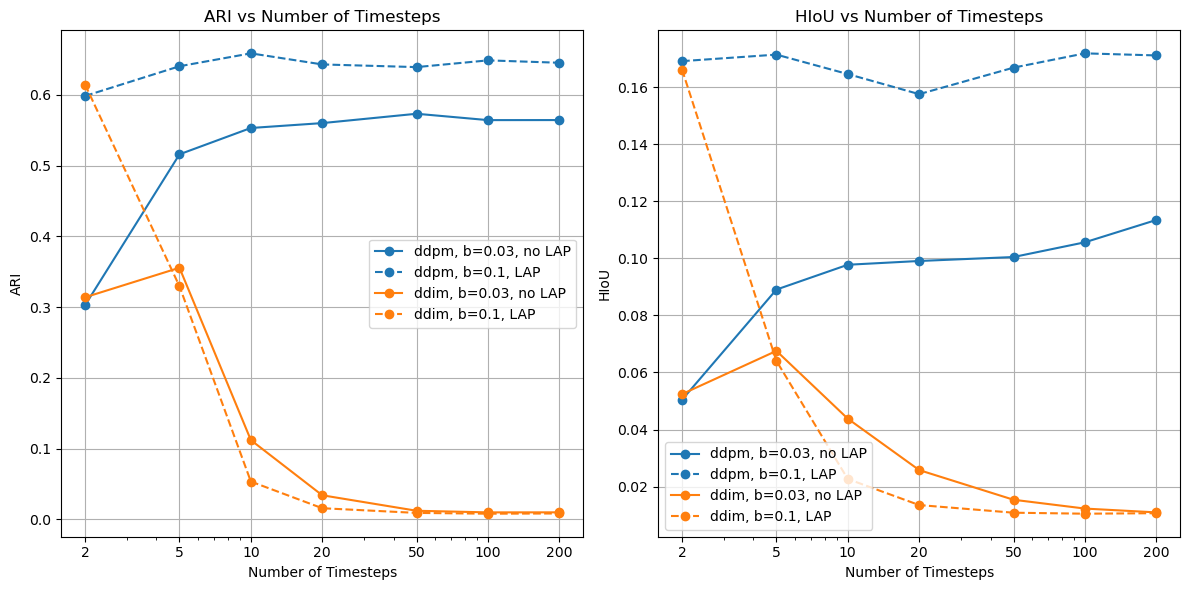

In [266]:
uq_sampler_types = table["sampler_type"].unique()
uq_model_ids = table["model_id"].unique()
plt.figure(figsize=(12,6))
for i,sampler_type in enumerate(uq_sampler_types):
    for j,uq_model_id in enumerate(uq_model_ids):
        idx = np.logical_and(table["sampler_type"].values == sampler_type,
                             table["model_id"].values == uq_model_id)
        print(f"Found {sum(idx)} entries for sampler_type={sampler_type} and model_id={uq_model_id}")
        x = table[idx]["num_timesteps"].astype(int).values
        x_sort = np.argsort(x)
        x = x[x_sort]
        y1 = table[idx]["ari"].astype(float).values[x_sort]
        y2 = table[idx]["hiou"].astype(float).values[x_sort]
        col = f"C{i}"

        s = "-o" if j==0 else "--o"

        model = "b=0.03, no LAP" if uq_model_id == "entityv3[input_scale_sweep]_3" else "b=0.1, LAP"

        plt.subplot(1,2,1)
        plt.plot(x, y1, s, label=f"{sampler_type}, {model}", color=col)

        plt.subplot(1,2,2)
        plt.plot(x, y2, s, label=f"{sampler_type}, {model}", color=col)

plt.subplot(1,2,1)
plt.xlabel("Number of Timesteps")
plt.ylabel("ARI")
plt.title("ARI vs Number of Timesteps")
plt.xscale("log")
plt.xticks(x, x)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.xlabel("Number of Timesteps")
plt.ylabel("HIoU")
plt.title("HIoU vs Number of Timesteps")
plt.xscale("log")
plt.xticks(x, x)
plt.legend()
plt.grid()

plt.tight_layout()


In [267]:
table = collect_gen_table(gen_id_patterns=["lap_gw_sweep_*"],
                        #gen_id_patterns=["abla_vali_all_*"],
                        model_id_patterns="*",
                        record_from_args=["model_id"],
                        record_from_sample_opts=["guidance_weight"],
                        include_mode="all",
                        verbose=0,
                        search_gen_setups_instead=0,
                        round_digits=5)
table[["model_id","guidance_weight","ari","max_ari","hiou","max_hiou"]]

,model_id,guidance_weight,ari,max_ari,hiou,max_hiou
0,entityv3[lap_sweep][skipm]_2,-1.0,0.10585,0.16657,0.03475,0.04726
1,entityv3[lap_sweep][skipm]_2,-0.1,0.62870,0.70622,0.18636,0.23079
2,entityv3[lap_sweep][skipm]_2,0.0,0.64120,0.71459,0.19005,0.23396
3,entityv3[lap_sweep][skipm]_2,0.1,0.64769,0.71660,0.19351,0.23645
4,entityv3[lap_sweep][skipm]_2,0.2,0.65087,0.71849,0.19242,0.23520
5,entityv3[lap_sweep][skipm]_2,0.3,0.65306,0.71790,0.19113,0.23155
6,entityv3[lap_sweep][skipm]_2,0.5,0.65686,0.72010,0.18715,0.22481
7,entityv3[lap_sweep][skipm]_2,0.8,0.65888,0.72010,0.18181,0.21929
8,entityv3[lap_sweep][skipm]_2,1.0,0.65929,0.71945,0.17733,0.21217
9,entityv3[lap_sweep][skipm]_2,1.5,0.65875,0.71536,0.16800,0.20123


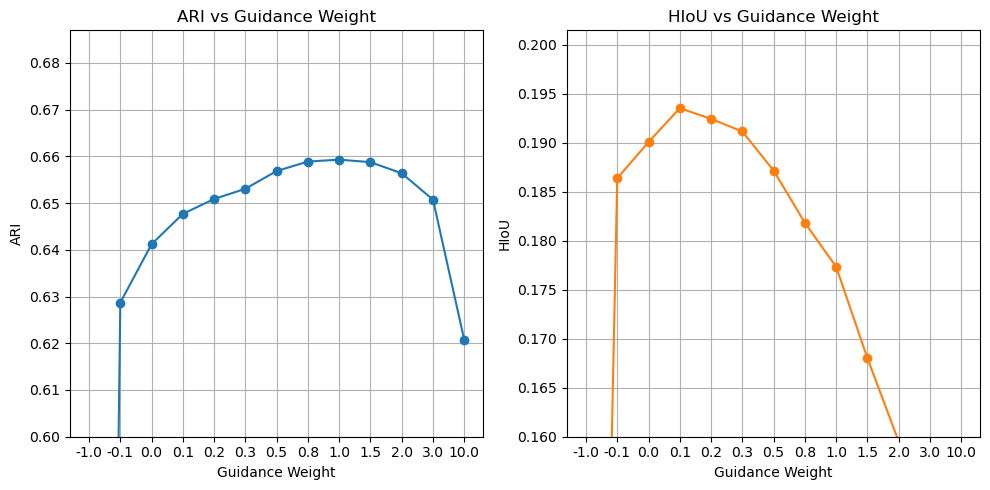

In [268]:
x = table["guidance_weight"].astype(float).values
x_sort = np.argsort(x)
x[x_sort]
y1 = table["ari"].astype(float).values[x_sort]
y2 = table["hiou"].astype(float).values[x_sort]
x = x.astype(str)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y1, "-o", label="ARI", color="C0")
plt.xlabel("Guidance Weight")
plt.ylabel("ARI")
plt.title("ARI vs Guidance Weight")
plt.ylim(0.6,None)
plt.grid()
plt.subplot(1,2,2)
plt.plot(x, y2, "-o", label="HIoU", color="C1")
plt.xlabel("Guidance Weight")
plt.ylabel("HIoU")
plt.title("HIoU vs Guidance Weight")
plt.ylim(0.16,None)
plt.grid()
plt.tight_layout()



In [253]:
%load_ext autoreload
%autoreload 2
%matplotlib qt
import os,sys
sys.path.append('./source/')
import matplotlib.pyplot as plt
from source.utils.mixed import set_random_seed, apply_mask
from source.utils.dataloading import get_dataset_from_args
from source.utils.plot import (visualize_dataset_with_labels, 
                              visualize_batch,visualize_cond_batch,
                              mask_overlay_smooth,imagenet_preprocess)
from source.utils.argparsing import TieredParser
from source.utils.analog_bits import AnalogBits
import argparse
import torch
import numpy as np
import jlc
from PIL import Image
modified_args={"diff_channels": 6,
                "dl_num_workers": 0,
                "semantic_dl_prob": 0,
                "seed": 2,
                "train_batch_size": 32,
                "lap_mode": "random",
                "image_size": 256,
                "imagenet_norm": 1,
                "datasets": "entityseg"}
args = TieredParser().get_args(alt_parse_args=["--model_name","entityv3"],modified_args=modified_args)
dataset = get_dataset_from_args(args,split="vali",return_type="dli")

batch = next(dataset)
label_int = batch[0]
ab = AnalogBits(args=args)
aboi = lambda x: mask_overlay_smooth(get_zero_im(x),bit_to_np(x,ab),alpha_mask=1.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
processing dataset:  entityseg


In [259]:
bit = ab.int2bit(label_int)
prob = ab.bit2prob(bit)

i = 0
numpy_items = {"bit": bit[i],
            "prob": prob[i],
            "int": label_int[i]}
numpy_items = {k: v.cpu().detach().numpy().transpose((1,2,0)) for k,v in numpy_items.items()}
numpy_items["col"] = aboi(bit[i])
numpy_items["prob"].min(), numpy_items["bit"].min()

(0.0, -1.0)

In [255]:
plt.hist(numpy_items["prob"].flatten())

(array([4128768.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   65536.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [257]:
plt.imshow(label_int[0,0].cpu().numpy(),cmap="viridis")
plt.colorbar()

In [260]:
plt.imshow(aboi(ab.int2bit(label_int)[0]))

In [221]:
idx = np.random.permutation(ab.int2bit(label_int).shape[1])[:3]
plt.imshow(ab.int2bit(label_int)[0].cpu().numpy()[idx].transpose((1,2,0)),cmap="viridis")

In [222]:
plt.imshow(bit_to_np(ab.int2bit(label_int)[0],ab).argmax(2),cmap="viridis")
plt.colorbar()

In [ ]:
entityv3[onehot_lap_sweep] --lap_mode none; --diff_channels 4; --mode cont --ckpt_name *07-30-13-15_entityv3[onehot_lap_sweep]_0_(diff_channels=4)_(lap_mode=none)/ckpt_*.pt
entityv3[onehot_lap_sweep] --lap_mode random; --diff_channels 6; --mode cont --ckpt_name *07-30-13-16_entityv3[onehot_lap_sweep]_1_(diff_channels=6)_(lap_mode=random)/ckpt_*.pt
entityv3[unigs_lap_sweep] --lap_mode none; --mode cont --ckpt_name *07-31-15-50_entityv3[unigs_lap_sweep]_2_(lap_mode=none)/ckpt_*.pt
entityv3[unigs_lap_sweep] --lap_mode random; --mode cont --ckpt_name *07-31-16-18_entityv3[unigs_lap_sweep]_3_(lap_mode=random)/ckpt_*.pt


In [ ]:
entityv3[onehot_lap_sweep] --lap_mode none; --diff_channels 8;
entityv3[onehot_lap_sweep] --lap_mode random; --diff_channels 8;
entityv3[onehot_lap_sweep] --lap_mode none; --diff_channels 6; --mode cont --ckpt_name *08-02-18-03_entityv3[onehot_lap_sweep]_3_(diff_channels=6)_(lap_mode=none)/ckpt_*.pt
entityv3[onehot_lap_sweep] --lap_mode random; --diff_channels 4; --mode cont --ckpt_name *08-02-18-05_entityv3[onehot_lap_sweep]_4_(diff_channels=4)_(lap_mode=random)/ckpt_*.pt


In [ ]:
python sample.py --gen_setup entopt[vali][10ts][gw1][all] --name_match_str "HPC_saves/HPC_saves_entityseg_300k/*/best_ckpt*.pt" --gen_id "ablav2_vali_all_*" --pure_eval_mode 0

In [ ]:
python sample.py --gen_setup entopt[vali][10ts][gw1][all] --name_match_str "HPC_saves/HPC_saves_entityseg_300k/08-02-18-*entityv3[onehot_lap_sweep]_*/best_ckpt*.pt" --gen_id "ablav2_vali_all_*" --pure_eval_mode 0